<div align="center">

<img src="logo_tec.jpg" alt="Logo" />

### Instituto Tecnológico de Monterrey  
### Materia: Modelación del aprendizaje con inteligencia artificial (Gpo 342)  
### Profesor: Enrique González Núñez  
### E2. Proyecto  
### Realizado por Aldo Reséndiz Cravioto
### Matrícula A01625395
</div>


### Proyecto orientado a la Metodología Cross Industry Standard Process for Data Mining 


### Introducción

El presente proyecto se desarrolla bajo el enfoque metodológico CRISP-DM (Cross-Industry Standard Process for Data Mining), abordando de manera estructurada las etapas 1 a 5 del proceso: comprensión del negocio, comprensión de los datos, preparación, modelado y evaluación. La etapa 6, correspondiente al despliegue, se representa mediante este mismo reporte, como una síntesis final del trabajo realizado.

El objetivo principal del proyecto es analizar y modelar el comportamiento de una variable objetivo relacionada con el impacto de la pandemia por COVID-19 en México, utilizando una base de datos que comprende el periodo de 2020 a 2023. Esta columna refleja cómo evolucionaron los casos a lo largo del tiempo, permitiendo observar el crecimiento inicial de la pandemia, sus picos y su posterior descenso.

Para modelar esta función objetivo, se implementaron cuatro algoritmos supervisados de aprendizaje automático: Árbol de Decisión (Decision Tree), Bosques Aleatorios (Random Forest), Máquinas de Vectores de Soporte (SVM) y una red neuronal tipo Multi-Layer Perceptron (MLP). Cada modelo fue ajustado y evaluado de forma rigurosa con el fin de comprender su capacidad para predecir el comportamiento de la variable y generar conclusiones basadas en métricas sólidas de desempeño.

## 1. Business Understanding 
Objetivo:
Comprender claramente los objetivos del proyecto desde una perspectiva de negocio y traducirlos en un problema de minería de datos bien definido.

Procesos realizados:

Identificar el problema principal del negocio.

Establecer objetivos del proyecto.

Determinar criterios de éxito desde el punto de vista del negocio.

Resultado obtenido:
Suponiendo que una organización del sistema de salud busca analizar el comportamiento del Covid19 en México, para esto se nos proporcionó con una base de datos con información relevante.

### 2. Data Understanding
Objetivo:
Familiarizarse con los datos disponibles, identificar problemas de calidad, y detectar patrones iniciales que puedan ser útiles.

Procesos realizados:

Recolección de datos iniciales.

Exploración de los datos (análisis descriptivo).

Verificación de calidad: datos faltantes, inconsistencias, duplicados.

Resultado obtenido:

Paso 1: Obtener los datos del archivo .csv para saber la información que contiene

Paso 2: Entender el contenido de la tabla 

In [331]:
# Importo librerias necesarias
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot
import sklearn # librería para poder usar modelos de machine learning
import numpy as np
import pickle
import math as mth

In [332]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.decomposition as sk # to compute PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression


In [333]:
def get_data():
    """
    Funcion para obtener los datos del archivo covid.csv
    """

    dataSet = pd.read_csv("covid.csv", header=0)
    dataSet.set_index('date', inplace=True)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

def infoData(dataSet):
    """
    Funcion para obtener datos generales
    """

    print(dataSet.head(10))
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [334]:
data = get_data()
infoData(data)


            AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE  \
date                                                                         
2020-02-26               0                0                    0         0   
2020-02-27               0                0                    0         0   
2020-02-28               0                0                    0         0   
2020-02-29               0                0                    0         0   
2020-03-01               0                0                    0         0   
2020-03-02               0                0                    0         0   
2020-03-03               0                0                    0         0   
2020-03-04               0                0                    0         0   
2020-03-05               0                0                    0         0   
2020-03-06               0                0                    0         0   

            CHIAPAS  CHIHUAHUA  DISTRITO FEDERAL  COAHUILA  COL

Como se puede observar los datos de la tabla muestran los casos de covid en cada uno de los estados de la república, en el index de la tabla se tiene la fecha de la recolección de los datos, y en la última columna se va la suma de todos los casos por dia en todo el territorio Nacional, por lo que de ahí se observa su nombre, por indicaciones del profesor trabajaré con esta última columna

### 3. Data Preparation 
Objetivo:
Construir el conjunto de datos definitivo que será utilizado por los modelos de machine learning.

Procesos realizados:

Selección de atributos relevantes.

Limpieza de datos (valores nulos, outliers, codificación).

Transformaciones necesarias (normalización).

Resultados obtenidos:
Un dataset listo para modelado, limpio, completo y con las variables transformadas adecuadamente, una función encargada del preprocesamiento de datos.

In [335]:
def preprocess_data(dataSet):
    """
    Funcion para el preprocesamiento de datos
    """

    local_dataSet = dataSet.dropna()
    columns_list = dataSet.columns.tolist()
    min_max_scaler = preprocessing.MinMaxScaler() # standardScaler o MinMaxScaler
    min_max_scaler.fit(local_dataSet)
    new_dataSet = min_max_scaler.transform(local_dataSet)

    new_dataSet = pd.DataFrame(np.round(new_dataSet,4), columns=columns_list)
    new_dataSet.index = local_dataSet.index

    return new_dataSet

La normalización consiste en transformar los valores de las variables numéricas para que estén en una escala comparable. Esto es fundamental porque muchos algoritmos de machine learning son sensibles a la magnitud de los valores. 

Se ultilizaron las siguientes normalizaciones para entender el comportamiento de los modelos:
### 1. Z-score Normalization (Estandarización)
¿Qué hace?
Transforma los datos para que tengan:

Media = 0

Desviación estándar = 1

Esto se logra restando a cada valor la media del conjunto de datos y luego dividiendo entre la desviación estándar.

¿Cuándo usarla?

Cuando los datos siguen una distribución aproximadamente normal (gaussiana).

En algoritmos que asumen una distribución centrada, como:

Regresión lineal

Support Vector Machines

PCA (Análisis de Componentes Principales)

Ventajas:

Los valores resultantes pueden ser positivos o negativos.

Se preserva la forma original de la distribución (aunque cambia la escala).

### 2. Min-Max Scaling (Normalización Min-Max)
¿Qué hace?
Reescala los datos para que estén en un rango fijo, normalmente entre [0, 1] o a veces entre [-1, 1].

Esto se logra restando el valor mínimo y dividiendo entre el rango (máx - mín).

¿Cuándo usarla?

Cuando se necesita un rango específico de entrada como:

Redes Neuronales (requieren entradas pequeñas y acotadas)

K-Nearest Neighbors (KNN) o SVM con kernels RBF, donde las distancias afectan mucho.

Ventajas:

Todos los valores estarán en la misma escala.

Conserva la forma de la distribución original (linealmente).

Desventajas:

Muy sensible a outliers. Si hay un valor atípico muy grande o muy pequeño, puede distorsionar el escalamiento de los demás.



Al final se optó por usar MinMaxScaler por su buen rendimiento en las métricas de evaluación de los modelos

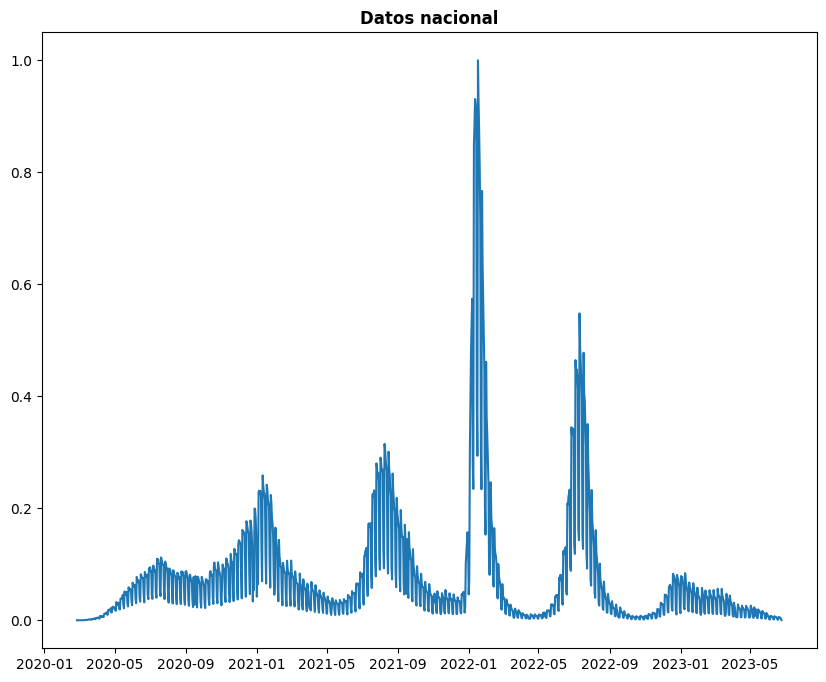

In [336]:
preprocessData = preprocess_data(data)

plt.figure(figsize=(10, 8))
plt.plot(preprocessData['Nacional'])
plt.title('Datos nacional', fontweight='bold')
plt.show()

Aquí se puede observar la gráfica de la función objetivo y su comportamiento a través del tiempo

In [337]:
def pca_Transformation(dataSet):
    features = dataSet
    features = features.drop(['Nacional'], axis=1)

    # principal components analysis
    pca = sk.PCA(n_components=3)
    principalComponents = pca.fit_transform(features)
    principalComp = pd.DataFrame(data = principalComponents,
                                 columns = ['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3'])
    principalComp.set_index(dataSet.index,inplace = True, drop=True)
    principalComp['Nacional'] = dataSet['Nacional']
    cols = principalComp.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    principalComp = principalComp[cols]

    print("==========================================================")
    print("                 PCA ANALYSIS")
    print("----------------------------------------------------------")
    print(principalComp)
    print("\n")

    varRatio = (pca.explained_variance_ratio_)*100
    data = {'P. Comp. 1':varRatio[0],'P. Comp. 2':varRatio[1],'P. Comp. 3':varRatio[2]}
    dfVar = pd.DataFrame(data, index=['Exp Var Ratio %'])
    print(dfVar)
    print("\n")

    return principalComp

En esta parte se crea la función para realizar el análisis PCA

Explicación PCA

PCA (Principal Component Analysis) es una técnica estadística utilizada en aprendizaje automático y análisis de datos para reducir la cantidad de variables (dimensiones) en un conjunto de datos, sin perder demasiada información.

Objetivo principal:
Reducir la dimensionalidad de los datos, es decir, reducir el número de variables con las que se trabaja, manteniendo la máxima variabilidad posible del conjunto de datos original.

Explicación del por qué se usa:
Cuando tienes muchas variables (columnas) que pueden estar correlacionadas entre sí.

Para simplificar los modelos, hacerlos más rápidos y menos propensos al overfitting.

Para visualizar datos complejos (en 2D o 3D).

Para eliminar redundancia entre variables.

Funcionamiento:

Estandarización de los datos

PCA requiere que los datos estén en la misma escala. Por eso se normalizan (Z-score).

Construcción de la matriz de covarianza

Esta matriz describe cómo varían las variables entre sí.

Si dos variables están altamente correlacionadas, PCA buscará combinar esa información.

Cálculo de eigein vectores y eigein valores

Los eigen vectores indican cuánta varianza (información) contiene cada nueva dirección (componente).

Los eigen valores son las direcciones nuevas que forman los ejes del nuevo espacio (las componentes principales).

Selección de componentes principales (PCs)

Se eligen las primeras componentes que capturan la mayor cantidad de varianza.

En este caso: 3 componentes explican el más del 85% de la información, lo que me permite trabajar solo con ellas.

Transformación de los datos

Los datos originales se proyectan al nuevo espacio de menor dimensión, usando las componentes seleccionadas.

¿Qué son las Componentes Principales (PCs)?

Son combinaciones lineales de las variables originales.

Cada componente está ordenada de mayor a menor cantidad de información que conserva:

PC1: contiene la mayor parte de la varianza.

PC2: la segunda mayor.

PC3: la tercera mayor.

Son ortogonales entre sí (no correlacionadas).



In [338]:
pcaData = pca_Transformation(preprocessData)
pcaData.head(1215)

                 PCA ANALYSIS
----------------------------------------------------------
            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2023-06-20    0.0055   -0.385418   -0.023980   -0.031617
2023-06-21    0.0050   -0.389817   -0.025970   -0.026036
2023-06-22    0.0048   -0.394643   -0.029628   -0.022447
2023-06-23    0.0026   -0.401546   -0.021571   -0.028535
2023-06-24    0.0002   -0.419864   -0.024882   -0.014331

[1215 rows x 4 columns]


                 P. Comp. 1  P. Comp. 2  P. Comp. 3
Exp Var Ratio %   81.101835    5.824434    3.614026




Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2023-06-20    0.0055   -0.385418   -0.023980   -0.031617
2023-06-21    0.0050   -0.389817   -0.025970   -0.026036
2023-06-22    0.0048   -0.394643   -0.029628   -0.022447
2023-06-23    0.0026   -0.401546   -0.021571   -0.028535
2023-06-24    0.0002   -0.419864   -0.024882   -0.014331

[1215 rows x 4 columns]

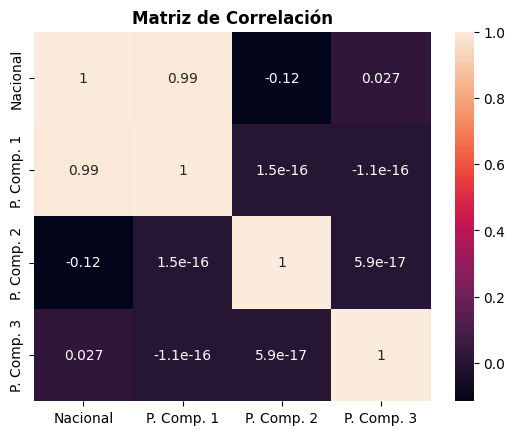

In [339]:
plt.figure()
sns.heatmap(pcaData.corr(), annot=True)
plt.title('Matriz de Correlación', fontweight='bold')
plt.show()
print("")

En esta Matriz de correlación notamos algo muy importante, el Componente 1 tiene una relación muy directa con Nacional, su relación es del 99%. Por lo que los modelos manuales usarían esta columna para intentar aproximarse al comportamiento de la función objetivo 'Nacional' en donde cada uno de los valores en esa columna son las variables objetivo.

In [340]:
train_data, test_data = train_test_split(pcaData, test_size=0.25, shuffle=False) #Ya probé con 20, y 30
print(train_data.head(1215))
print("")
print(len(train_data))
print("")
print(test_data.head(1215))
print("")
print(len(test_data))

            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2022-08-20    0.0210   -0.287385    0.002451    0.002460
2022-08-21    0.0187   -0.293690    0.000125    0.009103
2022-08-22    0.0691   -0.015549    0.005202    0.060701
2022-08-23    0.0507   -0.102404    0.010890    0.055541
2022-08-24    0.0462   -0.132828    0.019228    0.046232

[911 rows x 4 columns]

911

            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2022-08-25    0.0404   -0.171591    0.015264    0.020806
2022-08-26    0.0362   -0.204175    0.005791    0.015538
2

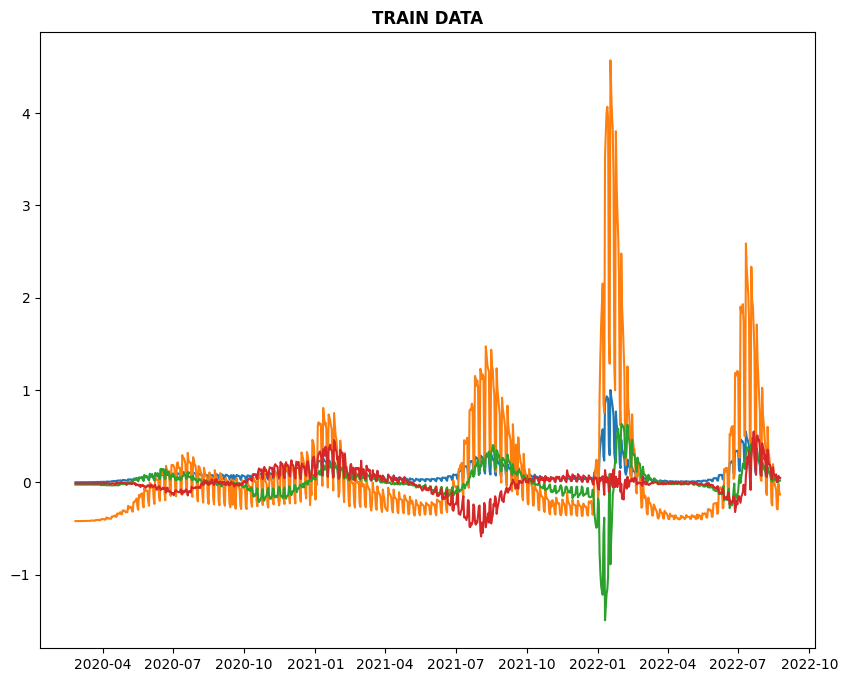

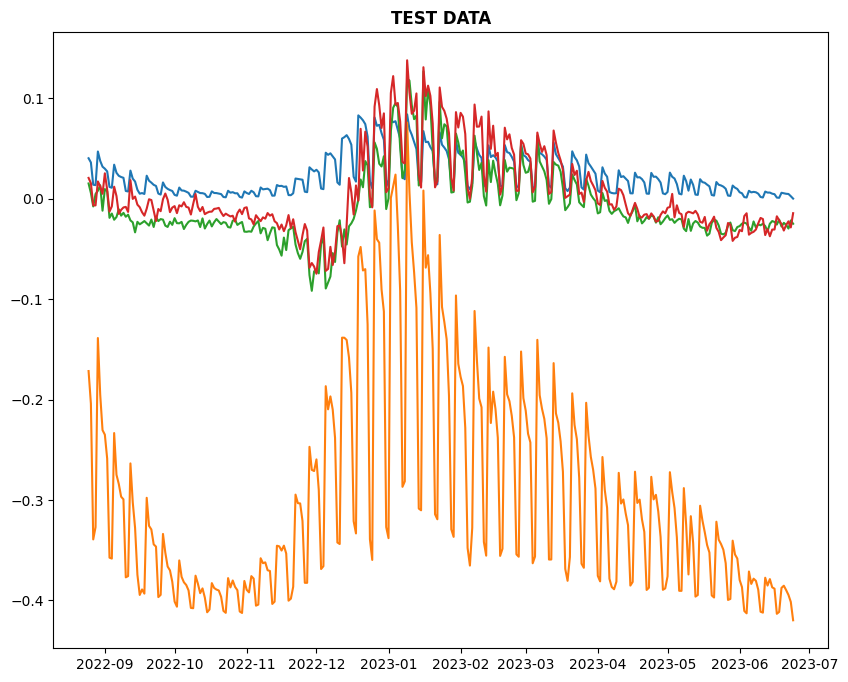

In [341]:
plt.figure(figsize=(10, 8))
plt.plot(train_data)
plt.title('TRAIN DATA', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(test_data)
plt.title('TEST DATA', fontweight='bold')
plt.show()

Por último se grafica el comportamiento de los tres componentes y la columna Nacional, para Train y Test

### 4. Modeling (Modelado)
Objetivo:
Aplicar técnicas de modelado apropiadas y ajustar sus parámetros para generar modelos predictivos.

Procesos realizados:

Selección de algoritmos (DT, RF, SVM, MLP).

Entrenamiento de modelos.

Ajuste de parámetros óptimos.

Calculo de residuales y errores relativos.

Resultados obtenidos:
Todos los modelos fueron entrenados y evaluados técnicamente en función de doce métricas. Todas las gráficas son mostradas para informar lo previamente establecido como objetivo.

In [342]:
class Model():
    def __init__(self,model):
        self.model = model
        self.training_data = None
        
    def load_training(self,training_data:pd.Series|list,Expected_results:pd.Series|list[int|float]):
        self.training_data = (training_data,Expected_results)

    def run_training(self):
        if self.training_data is None:
            raise ValueError("No hay datos de entrenamiento cargados. Usa load_training().")
            return False
        self.model.fit(self.training_data[0],self.training_data[1])
        return True
    
    def predict(self,data:pd.Series|list):
        return self.model.predict(data)
   
    def regression_test_accuracy(self,test_data:pd.Series|list,expected_results:pd.Series|list[int|float],k:int|float):
        results = self.model.predict(test_data)
        expected_results = list(expected_results)
        mean = sum(expected_results)/len(expected_results)
        rss = 0
        ssr = 0
        mae = 0
        mape = 0
        for i in range(len(results)):
            rss += (expected_results[i]-results[i])**2
            ssr += (results[i]-mean)**2
            mae += abs(expected_results[i]-results[i]) 
            mape += abs((expected_results[i]-results[i])/expected_results[i])
        if (np.isnan(mape)):
            mape = 0
        tss = rss+ssr
        evaluations = {"TSS":tss,"RSS":rss,"SSR":ssr,"R2":0,"MSE":0,"RMSE":0,
                       "MAPE":0,"MAE":0,"AIC":0,"BIC":0,
                       "TIME SERIES R2":0,"APC":0}
        try:
            evaluations["R2"] = 1-(rss/tss)
        except:
            evaluations["R2"] = np.nan
        try:
            evaluations["MSE"] = rss/len(expected_results)
        except:
            evaluations["MSE"] = np.nan
        try:
            evaluations["MAPE"] = mape*100/len(expected_results)
        except:
            evaluations["MAPE"] = np.nan
        try:
            evaluations["MAE"] = mae/len(expected_results)
        except:
            evaluations["MAE"] = np.nan
        try:
            evaluations["AIC"] = -2*mth.log(rss/len(expected_results))+2*(k)
        except:
            evaluations["AIC"] = np.nan
        try:
            evaluations["BIC"] = (k)*mth.log(len(expected_results))-len(expected_results)*mth.log(rss/len(expected_results))
        except:
            evaluations["BIC"] = np.nan
        try:
            evaluations["APC"] = mth.sqrt(rss)+2*(k)/len(expected_results)
        except:
            evaluations["APC"] = np.nan
        try:
            evaluations["TIME SERIES R2"] = 1-((1-evaluations["R2"])*(len(expected_results)-1)/(len(expected_results)-1-test_data.shape[1]))
        except:
            evaluations["TIME SERIES R2"] = np.nan
        try:
            evaluations["RMSE"] = mth.sqrt(evaluations["MSE"])
        except:
            evaluations["RMSE"] = np.nan
        return evaluations

In [343]:
# === Definición de variables (X e Y) Train y Test===
X_train = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]  # Características
Y_train = train_data[['Nacional']]  # Objetivo
X_test = test_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]  # Características
Y_test = test_data[['Nacional']]  # Objetivo

# Definición de variables globales (todos los modelos usan el mismo) para evaluación para Train y Test
n_train = len(Y_train["Nacional"])
print("Número de observaciones (n):", n_train)
p_train = len(X_train.columns)  # Número de variables independientes (componentes principales)
print("Número de variables independientes (p):", p_train)
n_test = len(Y_train["Nacional"])
print("Número de observaciones (n):", n_test)
p_test = len(X_train.columns)  # Número de variables independientes (componentes principales)
print("Número de variables independientes (p):", p_test)

Número de observaciones (n): 911
Número de variables independientes (p): 3
Número de observaciones (n): 911
Número de variables independientes (p): 3


In [344]:
# Decision Tree Regressor
dt_regr = DecisionTreeRegressor()
param_search_dt_regr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 5, 7, 9, 15, 20, None]
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_dt = GridSearchCV(estimator=dt_regr, param_grid=param_search_dt_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_dt.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_dt = grid_search_dt.best_params_

print("==========================================================")
print("Mejores parámetros para Decision Tree Regressor:")
print(best_params_dt)
print("----------------------------------------------------------")

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Mejores parámetros para Decision Tree Regressor:
{'criterion': 'absolute_error', 'max_depth': 9}
----------------------------------------------------------


In [345]:
# Implementación del Decision Tree Regressor con los mejores parámetros obtenidos por GridSearchCV
dt_optimo = grid_search_dt.best_estimator_
# === Ajustar el modelo RF con los datos de entrenamiento ===
dt_optimo.fit(X_train, Y_train)
# Implementación manual de Decision Tree Regressor
dt_manual = DecisionTreeRegressor(criterion="absolute_error", max_depth=20)  
# === Ajustar el modelo RF con los datos de entrenamiento ===
dt_manual.fit(X_train[['P. Comp. 1']], Y_train)

# === Predicciones ===
train_pred_dt1 = dt_optimo.predict(X_train)  # Predecir 'Nacional' para train 
test_pred_dt1 = dt_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_dt2 = dt_manual.predict(X_train[['P. Comp. 1']])  # Predecir 'Nacional' para train (implementación manual)  
test_pred_dt2 = dt_manual.predict(X_test[['P. Comp. 1']])    # Predecir 'Nacional' para test (implementación manual)

# === Convertir a DataFrames para análisis ===
pred_train_df_dt1 = pd.DataFrame(train_pred_dt1, columns=["Nacional"], index=X_train.index)
pred_test_df_dt1 = pd.DataFrame(test_pred_dt1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_dt2 = pd.DataFrame(train_pred_dt2, columns=["Nacional"], index=X_train.index) 
pred_test_df_dt2 = pd.DataFrame(test_pred_dt2, columns=["Nacional"], index=X_test.index)

pred_train_df_dt1.columns = ["Nacional"]
pred_test_df_dt1.columns = ["Nacional"]
#Manual
pred_train_df_dt2.columns = ["Nacional"]
pred_test_df_dt2.columns = ["Nacional"]

# Datos de mi arbol de decisión
n_leaves_dt = dt_optimo.tree_.n_leaves
n_nodes_dt = dt_optimo.tree_.node_count

print(f"Número de hojas (leaves): {n_leaves_dt}")
print(f"Número total de nodos: {n_nodes_dt}")
print(f"Profundidad del árbol: {dt_optimo.get_depth()}")

Número de hojas (leaves): 304
Número total de nodos: 607
Profundidad del árbol: 9


In [346]:
# Calculo de residuales y errores relativos para Random Forest
dt_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_dt1["Nacional"]
})
# Creo un dataframe con los resultados
dt_train_results["Residuals"] = dt_train_results["Real Nacional"] - dt_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
dt_train_results["Rel. Error"] = (1 - (dt_train_results["Pred. Nacional"] / dt_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
dt_test_pred = pred_test_df_dt1["Nacional"]
dt_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": dt_test_pred
})
dt_test_results["Residuals"] = dt_test_results["Real Nacional"] - dt_test_results["Pred. Nacional"]
dt_test_results["Rel. Error"] = (1 - (dt_test_results["Pred. Nacional"] / dt_test_results["Real Nacional"])).abs()

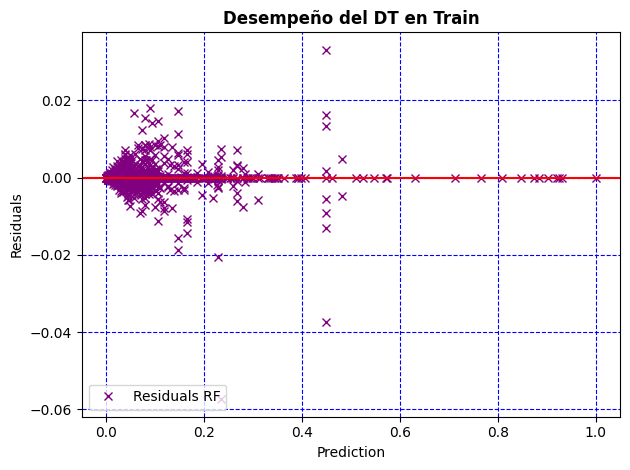

In [347]:
plt.figure()
plt.plot(dt_train_results['Pred. Nacional'], dt_train_results['Residuals'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del DT en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

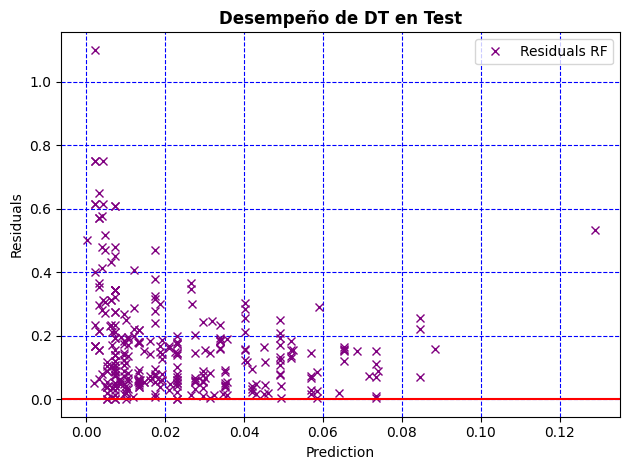

In [348]:
plt.figure()
plt.plot(dt_test_results['Pred. Nacional'], dt_test_results['Rel. Error'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de DT en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [349]:
# Métricas de evaluación para Decision Tree Regressor
dt_model = Model(dt_optimo)

# Carga de training data (X_train, Y_train)
dt_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
dt_model.run_training()

# PRedicciones para train y test
train_pred_dt = dt_model.predict(X_train)
test_pred_dt = dt_model.predict(X_test)

k_dt = dt_optimo.tree_.node_count - n_leaves_dt # Estimación de k para DT, otorgada por el profesor
# Resultados de metricas de train y test
train_metrics_dt = dt_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_dt)
test_metrics_dt = dt_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_dt)

print("Train metrics:", train_metrics_dt)
print("Test metrics:", test_metrics_dt)    

Train metrics: {'TSS': np.float64(14.897312614072456), 'RSS': np.float64(0.014626345000000002), 'SSR': np.float64(14.882686269072456), 'R2': np.float64(0.9990181890265105), 'MSE': np.float64(1.6055263446761803e-05), 'RMSE': 0.004006901976185816, 'MAPE': 0.0, 'MAE': np.float64(0.0017126234906695923), 'AIC': np.float64(628.0789476430816), 'BIC': np.float64(12121.76714929344), 'TIME SERIES R2': np.float64(0.9990149415811738), 'APC': np.float64(0.7861425005327862)}
Test metrics: {'TSS': np.float64(0.12655925555921058), 'RSS': np.float64(0.006664880000000005), 'SSR': np.float64(0.11989437555921058), 'R2': np.float64(0.9473378697547581), 'MSE': np.float64(2.192394736842107e-05), 'RMSE': 0.00468230150336574, 'MAPE': np.float64(16.77760062110543), 'MAE': np.float64(0.0029924342105263142), 'AIC': np.float64(627.4558620628418), 'BIC': np.float64(4993.550427078037), 'TIME SERIES R2': np.float64(0.9468112484523057), 'APC': np.float64(2.0750597689370185)}


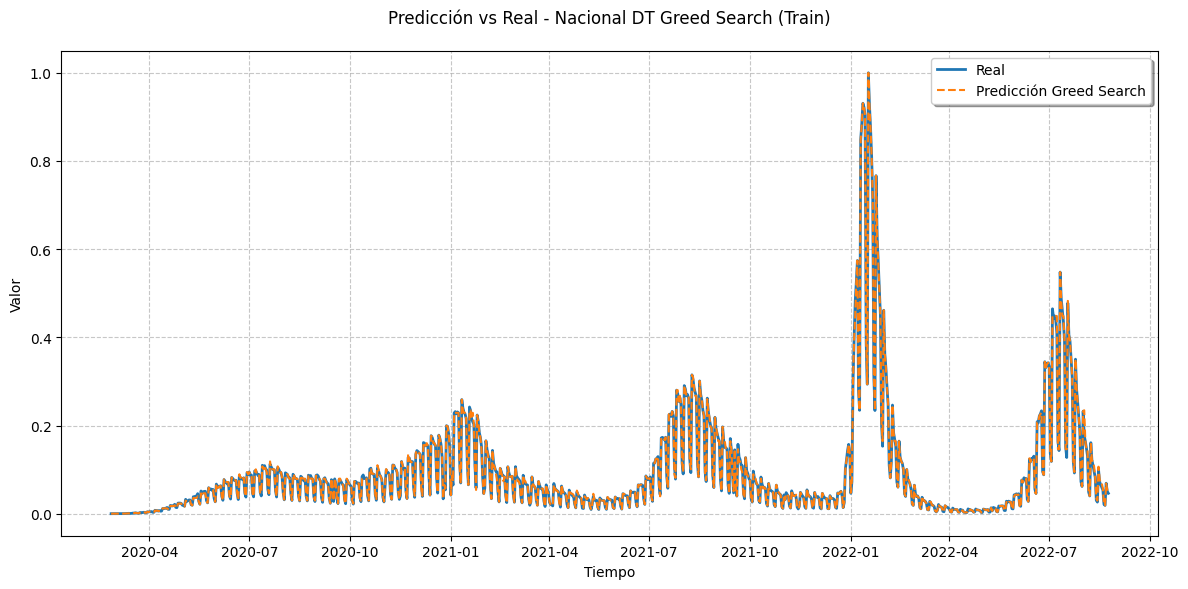

In [350]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_dt1.index, pred_train_df_dt1.values, label="Predicción Greed Search", linestyle="--") 
plt.title("Predicción vs Real - Nacional DT Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

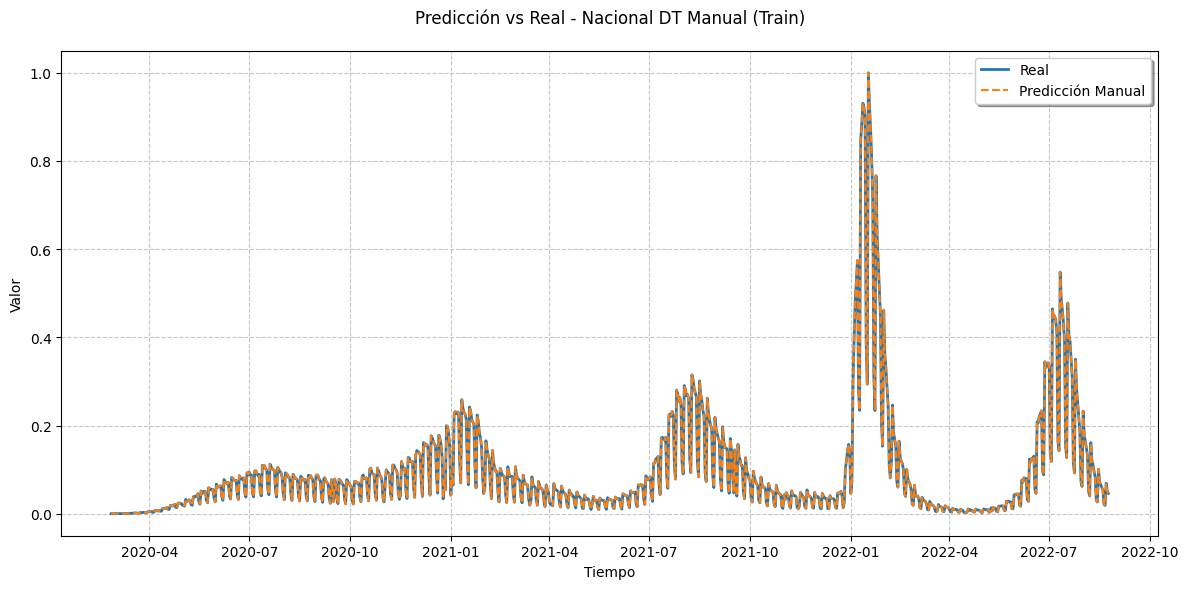

In [351]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2) 
plt.plot(pred_train_df_dt2.index, pred_train_df_dt2.values, label="Predicción Manual", linestyle="--")  
plt.title("Predicción vs Real - Nacional DT Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

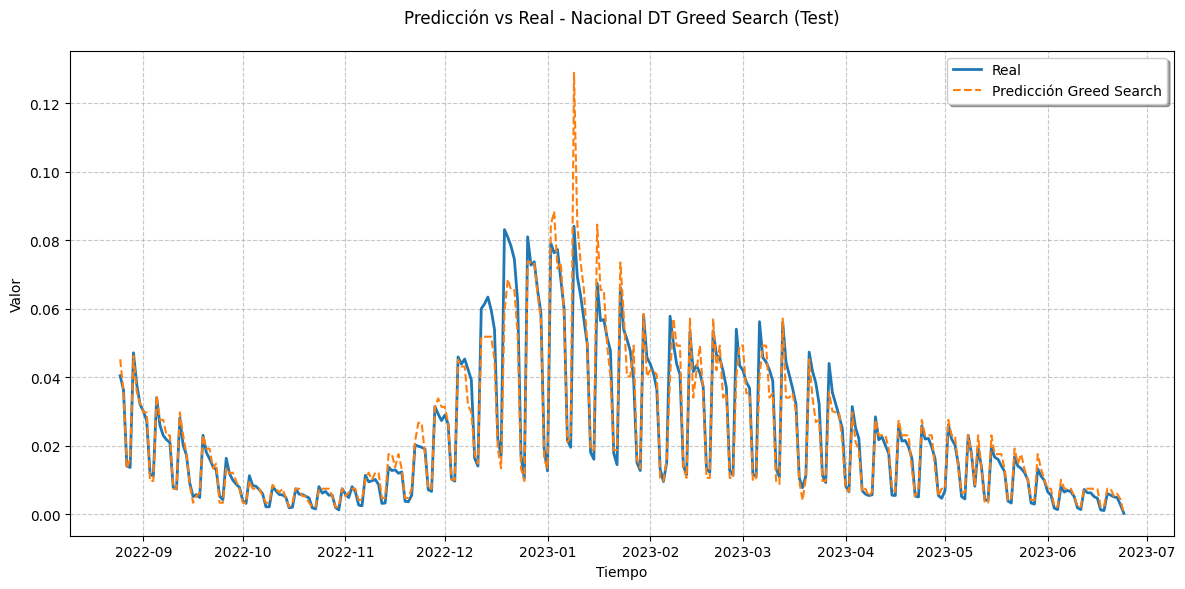

In [352]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_dt1.index, pred_test_df_dt1.values, label="Predicción Greed Search", linestyle="--")
plt.title("Predicción vs Real - Nacional DT Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

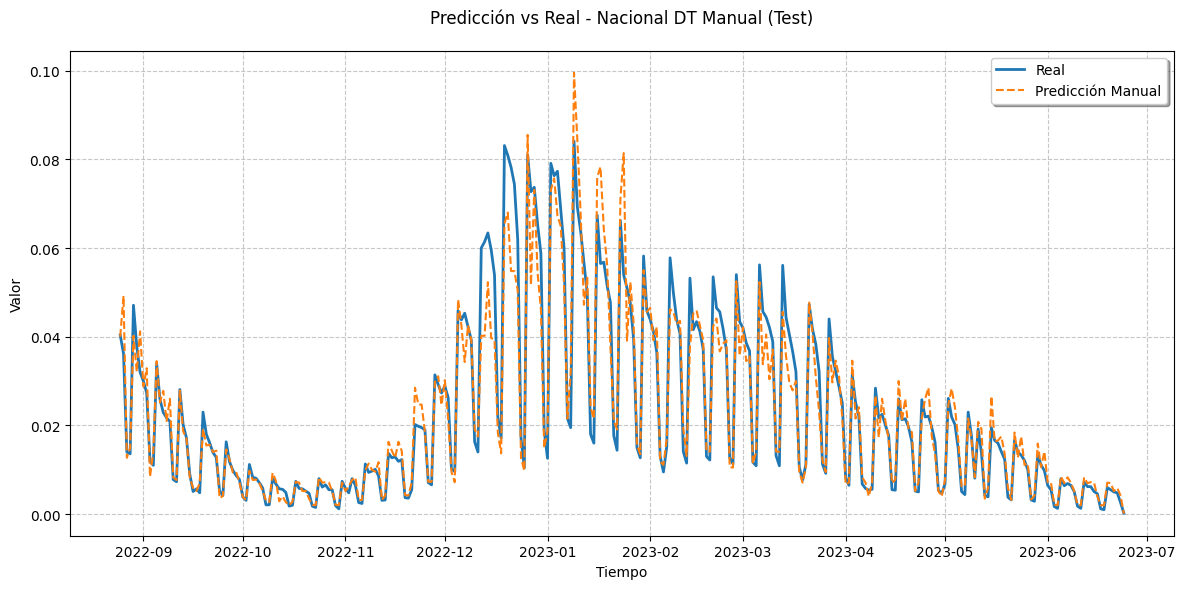

In [353]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2) 
plt.plot(pred_test_df_dt2.index, pred_test_df_dt2.values, label="Predicción Manual", linestyle="--")  
plt.title("Predicción vs Real - Nacional DT Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [354]:
# Random forest
rf_regr = RandomForestRegressor()
param_search_rf_regr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'], #Puedo añadir 'friedman_mse',
    'n_estimators': [10, 50, 100, 200, None], # Puedo probar con [10, 50, 100, 200, 500]
    'max_depth': [3, 5, 7, 9, 15, 20, None]
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_rf = GridSearchCV(estimator=rf_regr, param_grid=param_search_rf_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_rf.fit(X, y)  # Entreno el modelo con la columna 'Nacional' como característica y los componentes principales como objetivo
best_params_rf = grid_search_rf.best_params_

print("==========================================================")
print("Mejores parámetros para Decision Tree Regressor:")
print(best_params_rf)
print("----------------------------------------------------------")

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Mejores parámetros para Decision Tree Regressor:
{'criterion': 'poisson', 'max_depth': 15, 'n_estimators': 50}
----------------------------------------------------------


In [355]:
# Implementación del Random Forest Regressor con los mejores parámetros obtenidos por GridSearchCV
rf_optimo = grid_search_rf.best_estimator_
# === Ajustar el modelo RF con los datos de entrenamiento ===
rf_optimo.fit(X_train, Y_train)
# Implementación manual de Random Forest Regressor
rf_manual = RandomForestRegressor(criterion="absolute_error", n_estimators=47, max_depth=19)  # Implementación manual
# === Ajustar el modelo RF con los datos de entrenamiento ===
rf_manual.fit(X_train[['P. Comp. 1']], Y_train)

# === Predicciones ===
train_pred_rf1 = rf_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_r1 = rf_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_rf2 = rf_manual.predict(X_train[['P. Comp. 1']])  # Predecir 'Nacional' para train (implementación manual)
test_pred_r2 = rf_manual.predict(X_test[['P. Comp. 1']])    # Predecir 'Nacional' para test (implementación manual)

# === Convertir a DataFrames para análisis ===
pred_train_df_rf1 = pd.DataFrame(train_pred_rf1, columns=["Nacional"], index=X_train.index)
pred_test_df_rf1 = pd.DataFrame(test_pred_r1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_rf2 = pd.DataFrame(train_pred_rf2, columns=["Nacional"], index=X_train.index)
pred_test_df_rf2 = pd.DataFrame(test_pred_r2, columns=["Nacional"], index=X_test.index)

pred_train_df_rf1.columns = ["Nacional"]
pred_test_df_rf1.columns = ["Nacional"]
#Manual
pred_train_df_rf2.columns = ["Nacional"]
pred_test_df_rf2.columns = ["Nacional"]

# Calcular estadísticas de los árboles individuales en el Random Forest
n_leaves_rf = [est.tree_.n_leaves for est in rf_optimo.estimators_]
n_nodes_rf = [est.tree_.node_count for est in rf_optimo.estimators_]
depths_rf = [est.get_depth() for est in rf_optimo.estimators_]

print(f"Número promedio de hojas (leaves): {np.mean(n_leaves_rf):.2f}")
print(f"Número promedio de nodos: {np.mean(n_nodes_rf):.2f}")
print(f"Profundidad promedio del árbol: {np.mean(depths_rf):.2f}")

Número promedio de hojas (leaves): 553.04
Número promedio de nodos: 1105.08
Profundidad promedio del árbol: 15.00


In [356]:
# Calculo de residuales y errores relativos para Random Forest
rf_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_rf1["Nacional"]
})
# Creo un dataframe con los resultados
rf_train_results["Residuals"] = rf_train_results["Real Nacional"] - rf_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
rf_train_results["Rel. Error"] = (1 - (rf_train_results["Pred. Nacional"] / rf_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
rf_test_pred = pred_test_df_rf1["Nacional"]
rf_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": rf_test_pred
})
rf_test_results["Residuals"] = rf_test_results["Real Nacional"] - rf_test_results["Pred. Nacional"]
rf_test_results["Rel. Error"] = (1 - (rf_test_results["Pred. Nacional"] / rf_test_results["Real Nacional"])).abs()

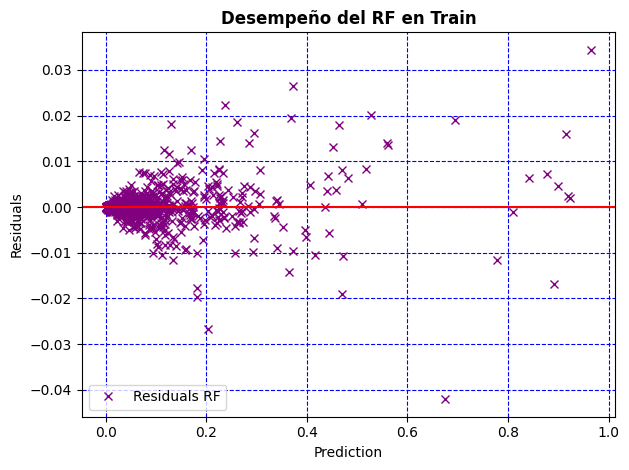

In [357]:
plt.figure()
plt.plot(rf_train_results['Pred. Nacional'], rf_train_results['Residuals'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del RF en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

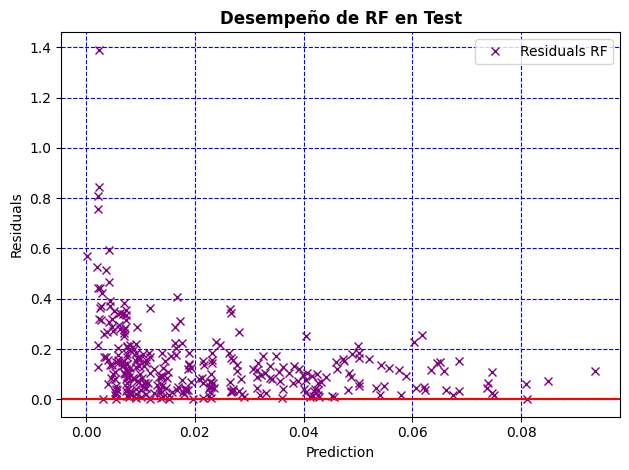

In [358]:
plt.figure()
plt.plot(rf_test_results['Pred. Nacional'], rf_test_results['Rel. Error'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de RF en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [359]:
# Metricas de evaluación para Random Forest Regressor
rf_model = Model(rf_optimo)

# Carga de datos de entrenamiento (X_train, Y_train)
rf_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
rf_model.run_training()

# PRedicciones para train y test
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

k_rf = sum([nodes - leaves for nodes, leaves in zip(n_nodes_rf, n_leaves_rf)]) # Estimación de k para Rf, adaptada a la que el profesor mencionó
# Resultados de metricas de train y test
train_metrics_rf = rf_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_rf)
test_metrics_rf = rf_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_rf)

print("Train metrics:", train_metrics_rf)
print("Test metrics:", test_metrics_rf)   

Train metrics: {'TSS': np.float64(14.8486461807648), 'RSS': np.float64(0.019893346750563153), 'SSR': np.float64(14.828752834014235), 'R2': np.float64(0.9986602585509557), 'MSE': np.float64(2.1836824095019925e-05), 'RMSE': 0.004672988775400592, 'MAPE': np.float64(inf), 'MAE': np.float64(0.0021702931907280425), 'AIC': np.float64(55225.46382566911), 'BIC': np.float64(197871.78564245018), 'TIME SERIES R2': np.float64(0.9986558272120946), 'APC': np.float64(60.73818976942172)}
Test metrics: {'TSS': np.float64(0.12333775114260227), 'RSS': np.float64(0.003908166082591325), 'SSR': np.float64(0.11942958506001095), 'R2': np.float64(0.9683133019178148), 'MSE': np.float64(1.2855809482208304e-05), 'RMSE': 0.003585499892931013, 'MAPE': np.float64(13.407472069695606), 'MAE': np.float64(0.002219876853592315), 'AIC': np.float64(55226.52342949801), 'BIC': np.float64(161224.95989791254), 'TIME SERIES R2': np.float64(0.9679964349369929), 'APC': np.float64(181.65462058993933)}


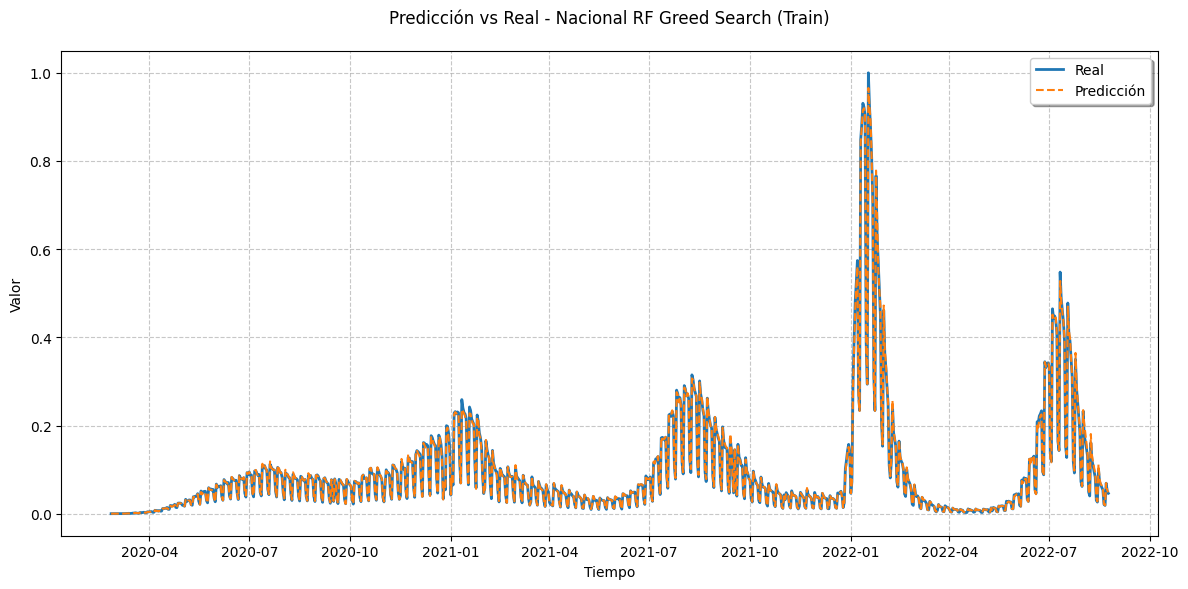

In [360]:
#Grafica de la predicción vs real RF Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_rf1.index, pred_train_df_rf1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

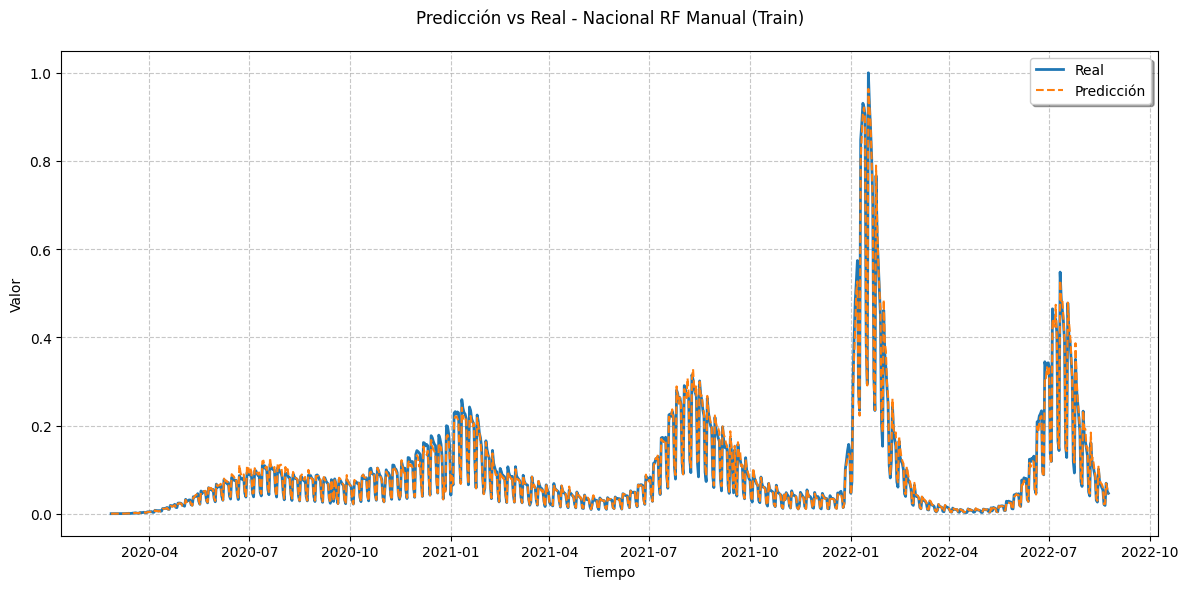

In [361]:
#Grafica de la predicción vs real RF Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_rf2.index, pred_train_df_rf2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

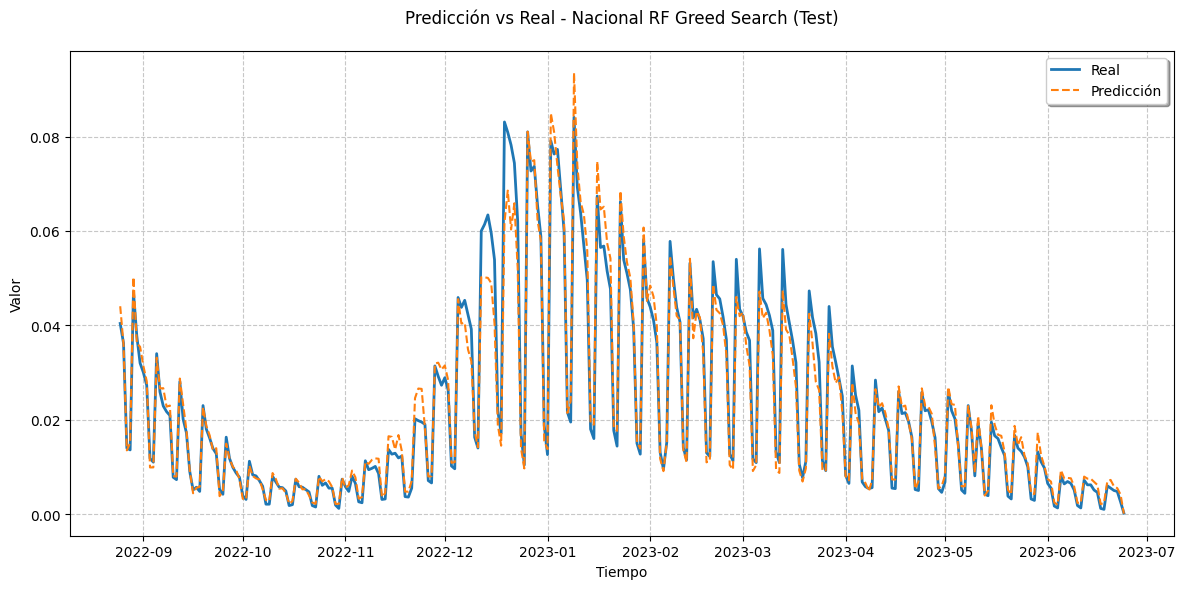

In [362]:
#Grafica de la predicción vs real RF Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_rf1.index, pred_test_df_rf1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

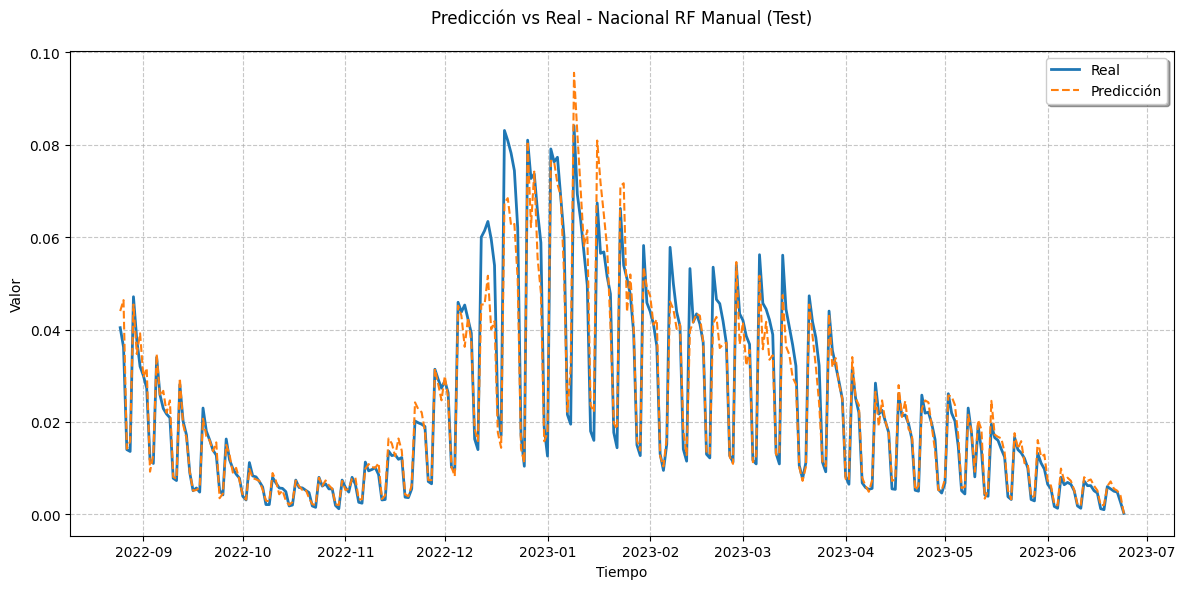

In [363]:
#Grafica de la predicción vs real RF Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_rf2.index, pred_test_df_rf2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [364]:
# Support Vector Machine
svm_regr = svm.SVR()
param_search_svm_regr = {
    'kernel': ['rbf', 'poly', 'sigmoid'],# , 'poly', 'rbf', 'sigmoid' linear
    'degree': [2, 3, 4, 5],  # 3, 4, 5, 6
    'gamma': ['scale', 'auto'],
    'epsilon': [0.005, 0.05, 0.1, 0.2, 0.5],
    'max_iter': [-1]# Número máximo de iteraciones
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y Y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_svm = GridSearchCV(estimator=svm_regr, param_grid=param_search_svm_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_svm.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_svm = grid_search_svm.best_params_

print("==========================================================")
print("Mejores parámetros para Support Vector Machine Regressor:")
print(best_params_svm)
print("----------------------------------------------------------")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Mejores parámetros para Support Vector Machine Regressor:
{'degree': 2, 'epsilon': 0.005, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1}
----------------------------------------------------------


In [365]:
# Implementación del Support Vector Machine Regressor con los mejores parámetros obtenidos por GridSearchCV
svm_optimo = grid_search_svm.best_estimator_
# === Ajustar el modelo SVM con los datos de entrenamiento ===
svm_optimo.fit(X_train, Y_train)
# Implementación del Support Vector Machine Regressor con los mejores parámetros obtenidos por GridSearchCV
svm_manual = svm.SVR(kernel='rbf', degree=3, gamma='scale', epsilon=0.05, max_iter=-1)  # Implementación manual
# === Ajustar el modelo SVM con los datos de entrenamiento ===
svm_manual.fit(X_train[['P. Comp. 1']], Y_train)

# === Predicciones ===
train_pred_svm1 = svm_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_svm1 = svm_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_svm2 = svm_manual.predict(X_train[['P. Comp. 1']])  # Predecir 'Nacional' para train (implementación manual)
test_pred_svm2 = svm_manual.predict(X_test[['P. Comp. 1']])    # Predecir 'Nacional' para test (implementación manual)


# === Convertir a DataFrames para análisis ===
pred_train_df_svm1 = pd.DataFrame(train_pred_svm1, columns=["Nacional"], index=X_train.index)
pred_test_df_svm1 = pd.DataFrame(test_pred_svm1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_svm2 = pd.DataFrame(train_pred_svm2, columns=["Nacional"], index=X_train.index)
pred_test_df_svm2 = pd.DataFrame(test_pred_svm2, columns=["Nacional"], index=X_test.index)

pred_train_df_svm1.columns = ["Nacional"]
pred_test_df_svm1.columns = ["Nacional"]
#Manual
pred_train_df_svm2.columns = ["Nacional"]
pred_test_df_svm2.columns = ["Nacional"]

In [366]:
# Calculo de residuales y errores relativos para Support Vector Machine
svm_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_svm1["Nacional"]
})
# Creo un dataframe con los resultados
svm_train_results["Residuals"] = svm_train_results["Real Nacional"] - svm_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
svm_train_results["Rel. Error"] = (1 - (svm_train_results["Pred. Nacional"] / svm_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
svm_test_pred = pred_test_df_svm1["Nacional"]
svm_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": svm_test_pred
})
svm_test_results["Residuals"] = svm_test_results["Real Nacional"] - svm_test_results["Pred. Nacional"]
svm_test_results["Rel. Error"] = (1 - (svm_test_results["Pred. Nacional"] / svm_test_results["Real Nacional"])).abs()

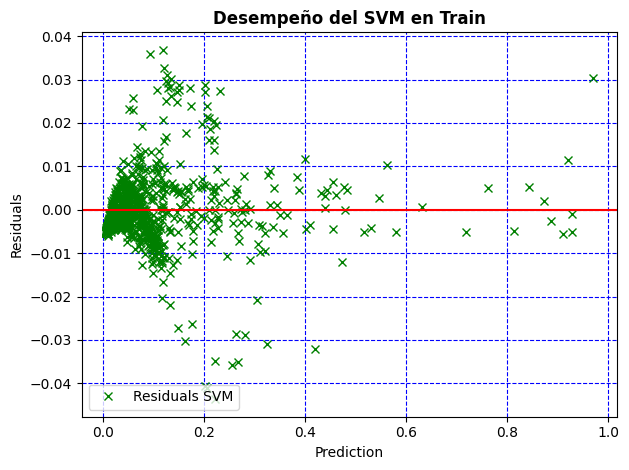

In [367]:
plt.figure()
plt.plot(svm_train_results['Pred. Nacional'], svm_train_results['Residuals'], 'x', color='green', label='Residuals SVM')  
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del SVM en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

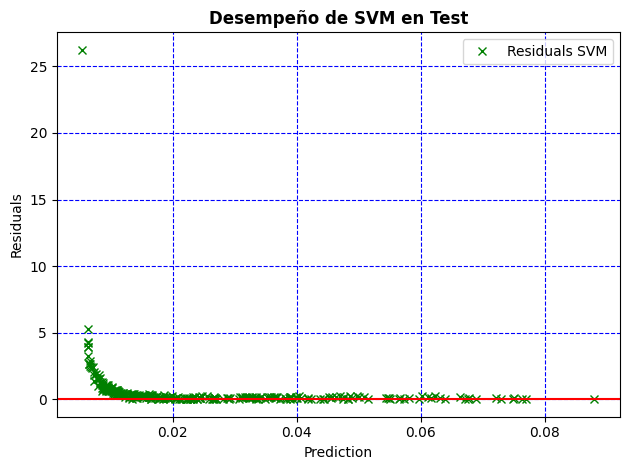

In [368]:
plt.figure()
plt.plot(svm_test_results['Pred. Nacional'], svm_test_results['Rel. Error'], 'x', color='green', label='Residuals SVM') 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de SVM en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [369]:
# Metricas de evaluación para Support Vector Machine Regressor
svm_model = Model(svm_optimo)

# Carga de datos de entrenamiento (X_train, Y_train)
svm_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
svm_model.run_training()

# PRedicciones para train y test
train_pred_svm = svm_model.predict(X_train)
test_pred_svm = svm_model.predict(X_test)

k_svm = len(svm_optimo.support_vectors_) # Estimación de k para SVM, otorgada por el profesor
# Resultados de metricas de train y test
train_metrics_svm = svm_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_svm)
test_metrics_svm = svm_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_svm)

print("Train metrics:", train_metrics_svm)
print("Test metrics:", test_metrics_svm)  

Train metrics: {'TSS': np.float64(14.755372095961423), 'RSS': np.float64(0.062173882623258354), 'SSR': np.float64(14.693198213338166), 'R2': np.float64(0.9957863561678478), 'MSE': np.float64(6.82479501901848e-05), 'RMSE': 0.008261231759863949, 'MAPE': np.float64(inf), 'MAE': np.float64(0.005298629512831529), 'AIC': 585.1847263163874, 'BIC': 10667.158477039007, 'TIME SERIES R2': np.float64(0.9957724190879179), 'APC': 0.8706421921113499}
Test metrics: {'TSS': np.float64(0.09818617778178937), 'RSS': np.float64(0.006522584834108625), 'SSR': np.float64(0.09166359294768074), 'R2': np.float64(0.9335692153267792), 'MSE': np.float64(2.1455871164831002e-05), 'RMSE': 0.004632048268836477, 'MAPE': np.float64(55.35672110036979), 'MAE': np.float64(0.0037655746575134853), 'AIC': 587.4990244721299, 'BIC': 4885.770559261706, 'TIME SERIES R2': np.float64(0.932904907480047), 'APC': 1.9426046264850008}


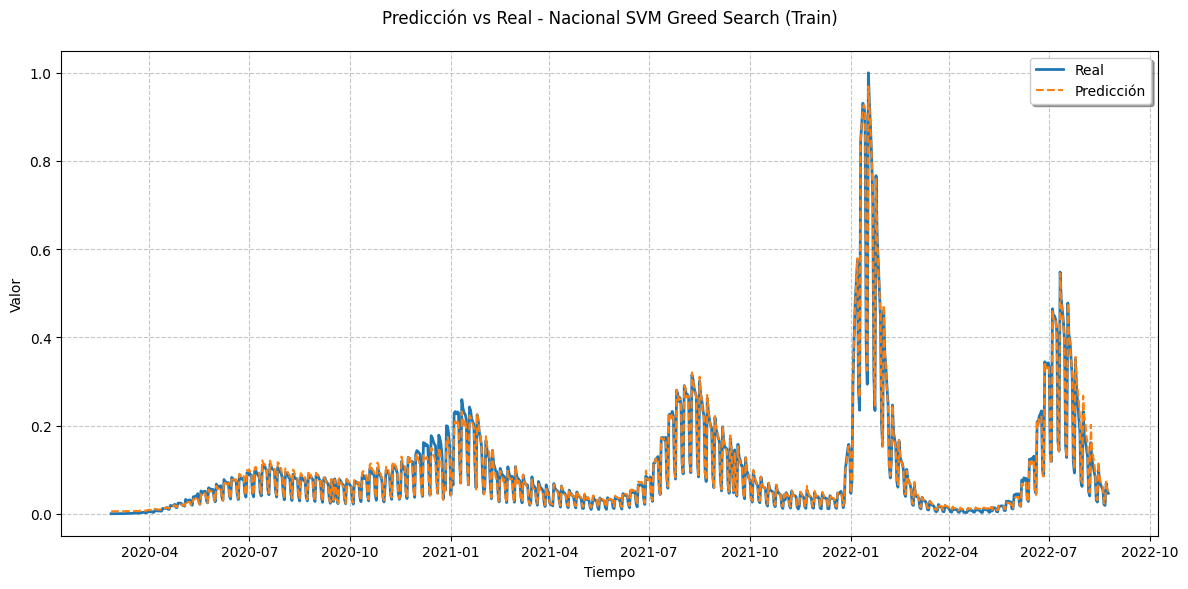

In [370]:
#Grafica de la predicción vs real SVM Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_svm1.index, pred_train_df_svm1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

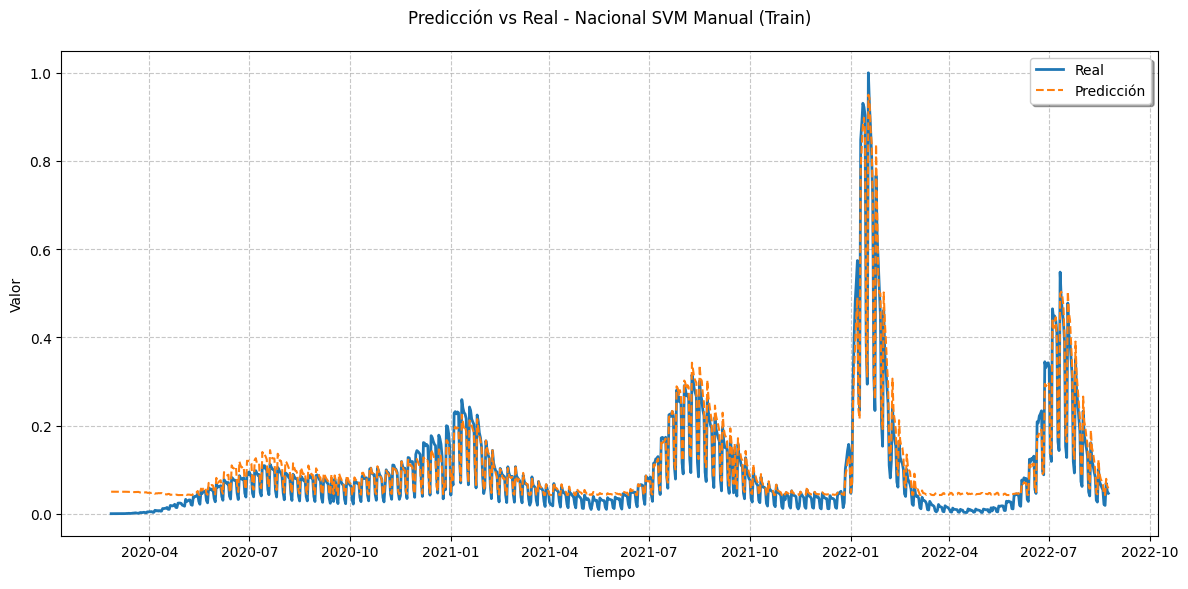

In [371]:
#Grafica de la predicción vs real SVM Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_svm2.index, pred_train_df_svm2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

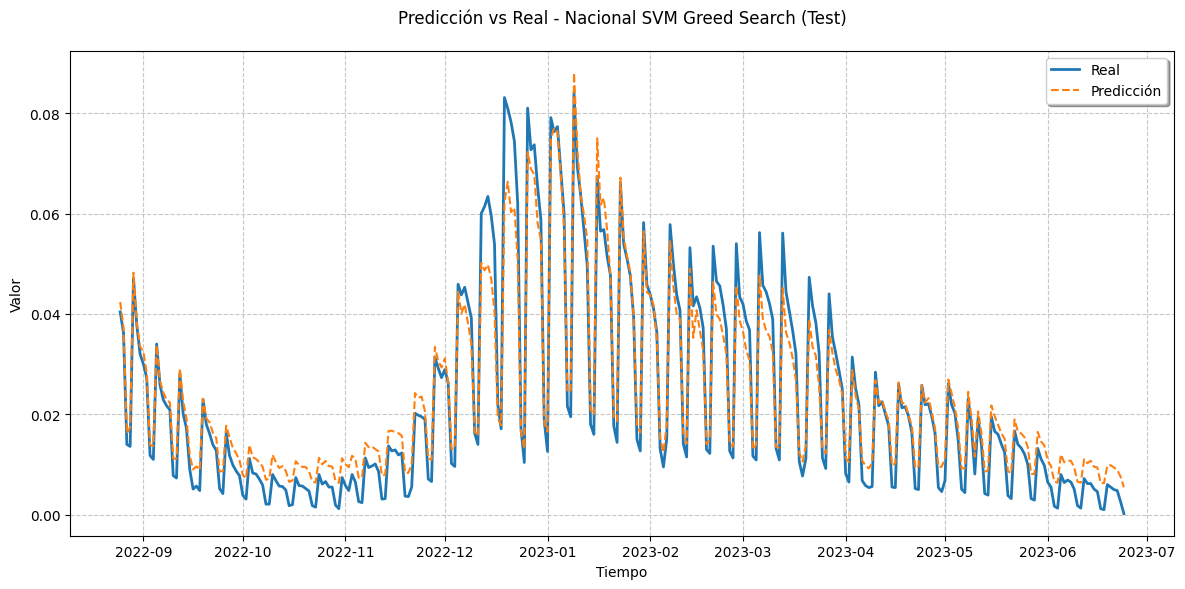

In [372]:
#Grafica de la predicción vs real SVM Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_svm1.index, pred_test_df_svm1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

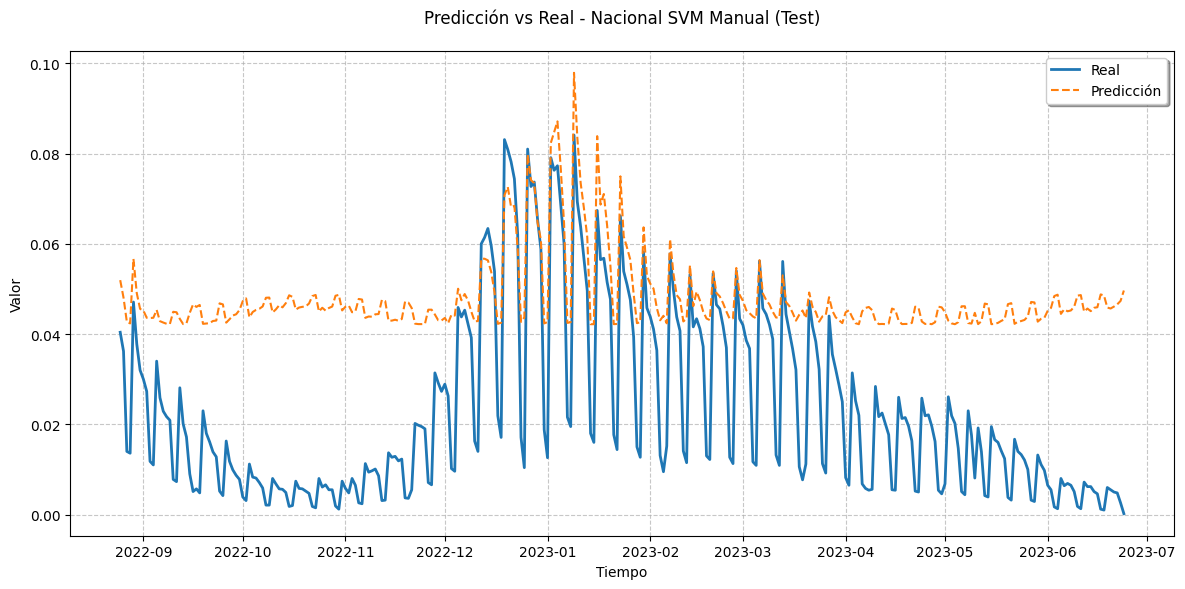

In [373]:
#Grafica de la predicción vs real SVM Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_svm2.index, pred_test_df_svm2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [374]:
# Multi-layer Perceptron Regressor
mlp_regr = MLPRegressor()
param_search_mlp_regr = {
    'random_state': [1, None],  # Fijo el estado aleatorio para reproducibilidad
    'max_iter': [1000, 2000, 3000],  # Puedo probar con [1000, 2000, 3000, 4000]
    'tol': [0.01, 0.1, 0.2],  # Puedo probar con [0.01, 0.05, 0.1, 0.2]
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Puedo probar con [(50,), (100,), (150,), (200,), (250,)]
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Puedo probar con ['constant', 'invscaling', 'adaptive']
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

# Le paso este objeto a la funcion de model_template y tambien le paso X Y
grid_search_mlp = GridSearchCV(estimator=mlp_regr, param_grid=param_search_mlp_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_mlp.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_mlp = grid_search_mlp.best_params_

print("==========================================================")
print("Mejores parámetros para Multi-layer Perceptron Regressor:")
print(best_params_mlp)
print("----------------------------------------------------------")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros para Multi-layer Perceptron Regressor:
{'hidden_layer_sizes': (150,), 'learning_rate': 'invscaling', 'max_iter': 2000, 'random_state': None, 'tol': 0.01}
----------------------------------------------------------


In [375]:
# Implementación del Multi-layer Perceptron Regressor con los mejores parámetros obtenidos por GridSearchCV
mlp_optimo = grid_search_mlp.best_estimator_
# === Ajustar el modelo MLP con los datos de entrenamiento ===
mlp_optimo.fit(X_train, Y_train)
# Implementación manual de Multi-layer Perceptron Regressor
mlp_manual = MLPRegressor(random_state=1, max_iter=1000, tol=0.01, hidden_layer_sizes=(100,), learning_rate='constant')  # Implementación manual
# === Ajustar el modelo MLP con los datos de entrenamiento ===
mlp_manual.fit(X_train[['P. Comp. 1']], Y_train)

# === Predicciones ===
train_pred_mlp1 = mlp_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_mlp1 = mlp_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_mlp2 = mlp_manual.predict(X_train[['P. Comp. 1']])  # Predecir 'Nacional' para train (implementación manual)
test_pred_mlp2 = mlp_manual.predict(X_test[['P. Comp. 1']])    # Predecir 'Nacional' para test (implementación manual)

# === Convertir a DataFrames para análisis ===
pred_train_df_mlp1 = pd.DataFrame(train_pred_mlp1, columns=["Nacional"], index=X_train.index)
pred_test_df_mlp1 = pd.DataFrame(test_pred_mlp1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_mlp2 = pd.DataFrame(train_pred_mlp2, columns=["Nacional"], index=X_train.index)
pred_test_df_mlp2 = pd.DataFrame(test_pred_mlp2, columns=["Nacional"], index=X_test.index)

pred_train_df_mlp1.columns = ["Nacional"]
pred_test_df_mlp1.columns = ["Nacional"]
#Manual
pred_train_df_mlp2.columns = ["Nacional"]
pred_test_df_mlp2.columns = ["Nacional"]

In [376]:
# Función para analizar el tamaño de la red neuronal MLP para saber cuando mide su k
def analyze_network_size(mlp_model):
    """
    Analisis del tamaño de una red neuronal MLP y la categoriza en pequeña, mediana o grande.
    """
    # Get network parameters
    n_layers = len(mlp_model.coefs_)
    n_neurons = [layer.shape[0] for layer in mlp_model.coefs_]
    total_params = sum(layer.size for layer in mlp_model.coefs_)
    
    # Size categorization
    if total_params < 1000:
        size_category = "Pequeña"
    elif total_params < 100000:
        size_category = "Mediana"
    else:
        size_category = "Grande"
    
    print(f"Arquitectura de la Red Neuronal:")
    print(f"Número de capas: {n_layers}")
    print(f"Neuronas por capa: {n_neurons}")
    print(f"Total de parámetros: {total_params:,}")
    print(f"Categoría de la red en base a su tamaño: {size_category}")
    
# Use after training your model
analyze_network_size(mlp_optimo)

Arquitectura de la Red Neuronal:
Número de capas: 2
Neuronas por capa: [3, 150]
Total de parámetros: 600
Categoría de la red en base a su tamaño: Pequeña


In [377]:
# Calculo de residuales y errores relativos para Support Vector Machine
mlp_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_mlp1["Nacional"]
})
# Creo un dataframe con los resultados
mlp_train_results["Residuals"] = mlp_train_results["Real Nacional"] - mlp_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
mlp_train_results["Rel. Error"] = (1 - (mlp_train_results["Pred. Nacional"] / mlp_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
mlp_test_pred = pred_test_df_mlp1["Nacional"]
mlp_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": mlp_test_pred
})
mlp_test_results["Residuals"] = mlp_test_results["Real Nacional"] - mlp_test_results["Pred. Nacional"]
mlp_test_results["Rel. Error"] = (1 - (mlp_test_results["Pred. Nacional"] / mlp_test_results["Real Nacional"])).abs()

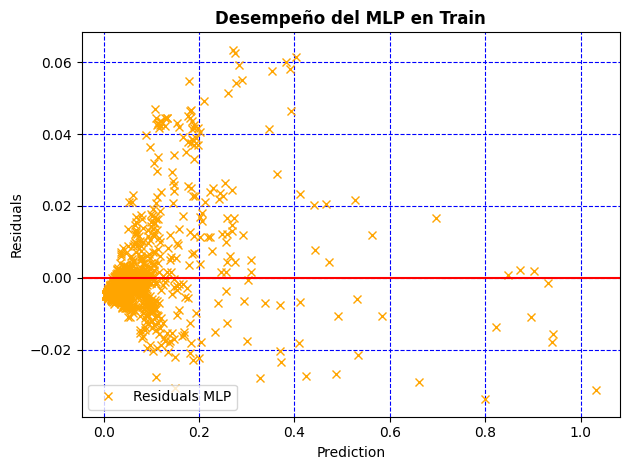

In [378]:
plt.figure()
plt.plot(mlp_train_results['Pred. Nacional'], mlp_train_results['Residuals'], 'x', color='orange', label='Residuals MLP')  
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del MLP en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

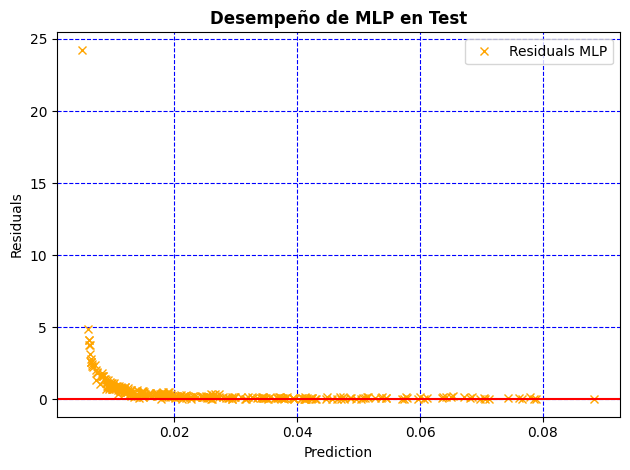

In [379]:
plt.figure()
plt.plot(mlp_test_results['Pred. Nacional'], mlp_test_results['Rel. Error'], 'x', color='orange', label='Residuals MLP') 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de MLP en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

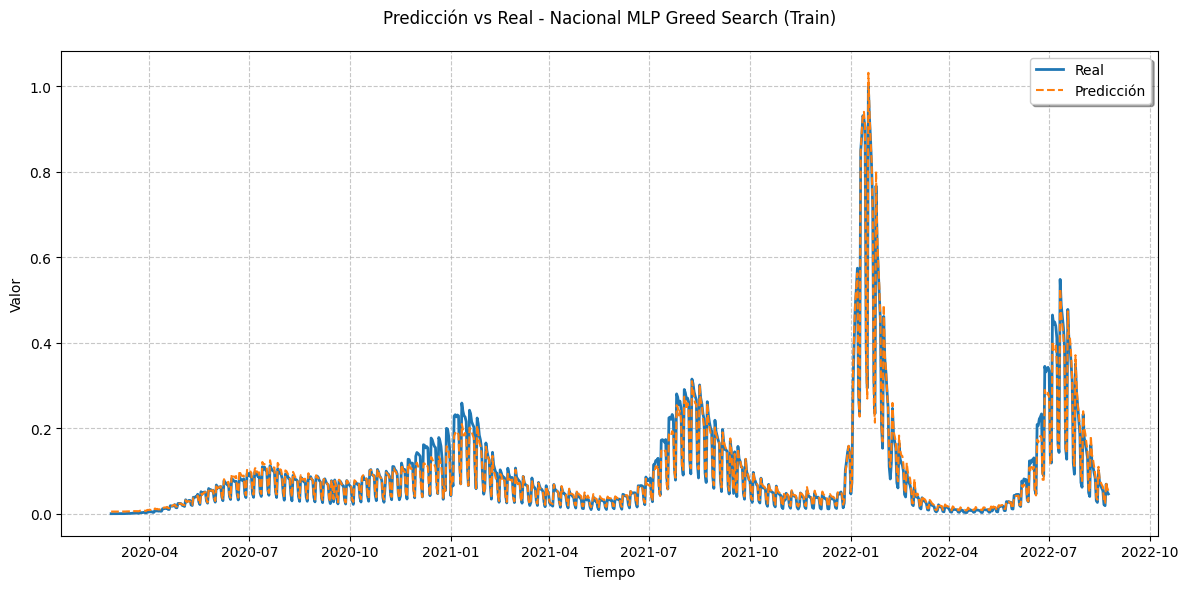

In [380]:
#Grafica de la predicción vs real MLP Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_mlp1.index, pred_train_df_mlp1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

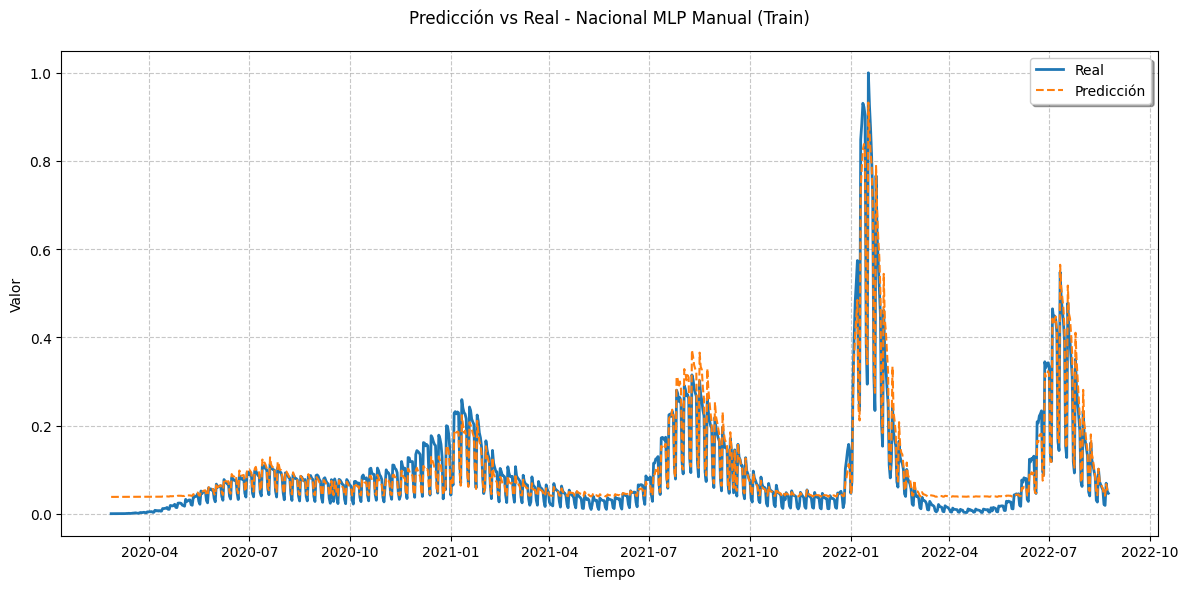

In [381]:
#Grafica de la predicción vs real MLP Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_mlp2.index, pred_train_df_mlp2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

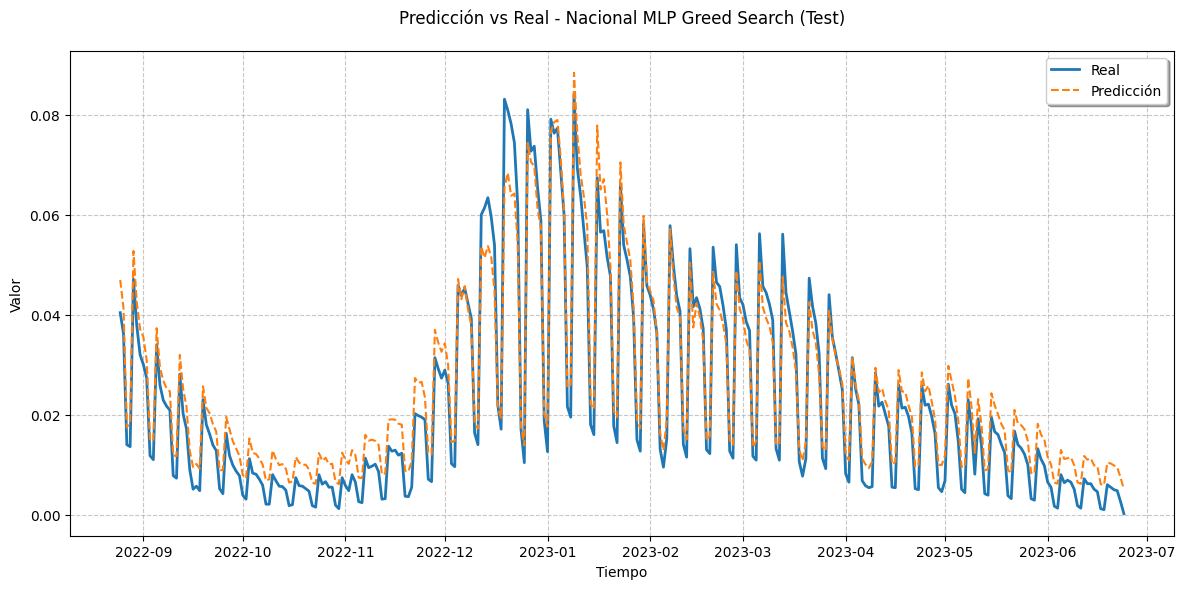

In [382]:
#Grafica de la predicción vs real MLP Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_mlp1.index, pred_test_df_mlp1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

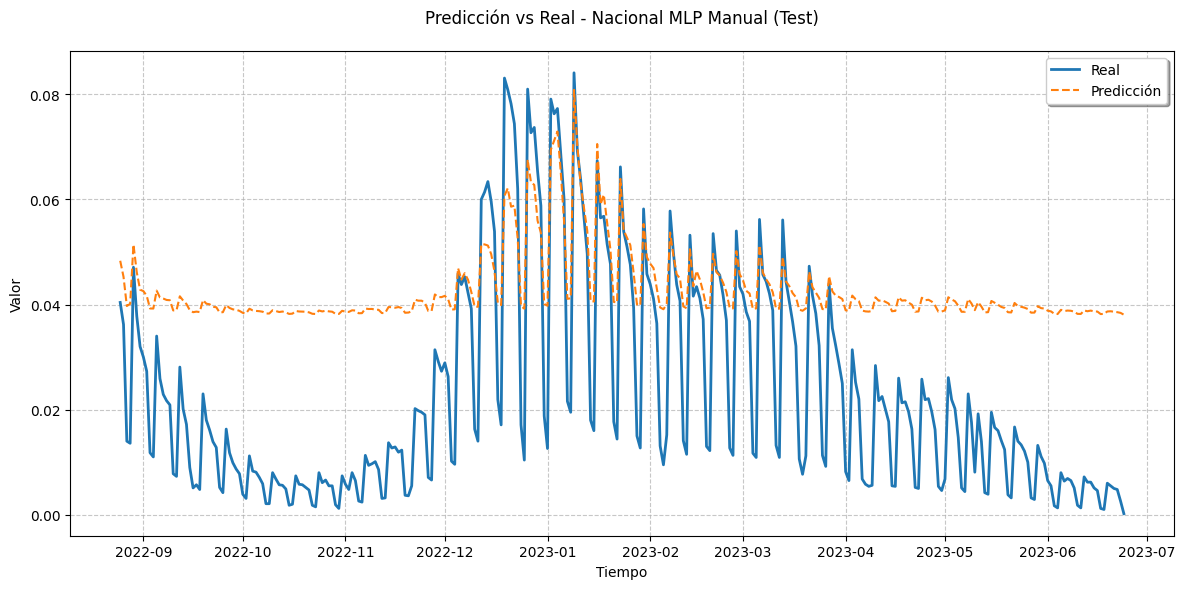

In [383]:
#Grafica de la predicción vs real MLP Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_mlp2.index, pred_test_df_mlp2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [384]:
# Metricas de evaluación para Multi-layer Perceptron Regressor
mlp_model = Model(mlp_optimo)

# Carga de datos de entrenamiento (X_train, Y_train)
mlp_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
mlp_model.run_training()

# PRedicciones para train y test
train_pred_mlp = mlp_model.predict(X_train)  # Predecir 'Nacional' para train
test_pred_mlp = mlp_model.predict(X_test)    # Predecir 'Nacional' para test

# Red pequeña: k≈50, Red mediana: k≈100–200, Red grande: k>500
# Resultados de metricas de train y test
train_metrics_mlp = mlp_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=50)
test_metrics_mlp = mlp_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=50)

print("Train metrics:", train_metrics_mlp)
print("Test metrics:", test_metrics_mlp)


Train metrics: {'TSS': np.float64(15.545330527683712), 'RSS': np.float64(0.19831064793328984), 'SSR': np.float64(15.347019879750421), 'R2': np.float64(0.9872430729227577), 'MSE': np.float64(0.0002176845751188692), 'RMSE': 0.014754137559304142, 'MAPE': np.float64(inf), 'MAE': np.float64(0.009978193849233652), 'AIC': 116.86492689214954, 'BIC': 8022.701344237115, 'TIME SERIES R2': np.float64(0.9872008780151152), 'APC': 0.5550903211585496}
Test metrics: {'TSS': np.float64(0.07881317508128408), 'RSS': np.float64(0.020545986009702512), 'SSR': np.float64(0.05826718907158157), 'R2': np.float64(0.739307723759227), 'MSE': np.float64(6.758548029507405e-05), 'RMSE': 0.008221038881739586, 'MAPE': np.float64(56.074437336144214), 'MAE': np.float64(0.005930285561358987), 'AIC': 119.20423477304024, 'BIC': 3204.8950705724287, 'TIME SERIES R2': np.float64(0.7367008009968192), 'APC': 0.4722860792067386}


### 5. Evaluation 
Objetivo:
Evaluar si el modelo resuelve adecuadamente el problema planteado desde el punto de vista del negocio.

Procesos realizados:

Comparar el rendimiento del modelo con los objetivos iniciales.

Analizar errores, limitaciones o posibles sesgos.

Validar que no se han omitido aspectos clave.

Resultados obtenidos:
Una evaluación formal de los modelos donde se validan si estan listos para su implementación o si requiere ajustes adicionales.

In [385]:
# Preparación de datos para comparar métricas de los modelos
models = ['Decision Tree', 'Random Forest', 'SVM', 'MLP']
train_metrics_list = [train_metrics_dt, train_metrics_rf, train_metrics_svm, train_metrics_mlp]
test_metrics_list = [test_metrics_dt, test_metrics_rf, test_metrics_svm, test_metrics_mlp]

# Lista de métricas a graficar
metrics_to_plot = ['MSE', 'RMSE', 'MAPE', 'MAE', 'R2', 'TSS', 'RSS', 'SSR', 'AIC', 'BIC', 'APC', 'TIME SERIES R2']

# Preparacion de dataframe para las métricas de train
train_metrics_df = pd.DataFrame(
    {model: {metric: train_metrics[metric] for metric in metrics_to_plot} 
     for model, train_metrics in zip(models, train_metrics_list)}
).T

# Preparación de dataframe para las métricas de test
test_metrics_df = pd.DataFrame(
    {model: {metric: test_metrics[metric] for metric in metrics_to_plot} 
     for model, test_metrics in zip(models, test_metrics_list)}
).T


In [386]:
# Creacion de DataFrame para recuento de métricas, cada fila representa un modelo y cada columna una métrica
train_metrics_recuento = pd.DataFrame(
    [train_metrics_dt, train_metrics_rf, train_metrics_svm, train_metrics_mlp],
    index=['Decision Tree', 'Random Forest', 'SVM', 'MLP']
)

test_metrics_recuento = pd.DataFrame(
    [test_metrics_dt, test_metrics_rf, test_metrics_svm, test_metrics_mlp],
    index=['Decision Tree', 'Random Forest', 'SVM', 'MLP']
)

print("Recuento de métricas para Train:")
print(train_metrics_recuento)
print("\nRecuento de métricas para Test:")
print(test_metrics_recuento)

Recuento de métricas para Train:
                     TSS       RSS        SSR        R2       MSE      RMSE  \
Decision Tree  14.897313  0.014626  14.882686  0.999018  0.000016  0.004007   
Random Forest  14.848646  0.019893  14.828753  0.998660  0.000022  0.004673   
SVM            14.755372  0.062174  14.693198  0.995786  0.000068  0.008261   
MLP            15.545331  0.198311  15.347020  0.987243  0.000218  0.014754   

               MAPE       MAE           AIC            BIC  TIME SERIES R2  \
Decision Tree   0.0  0.001713    628.078948   12121.767149        0.999015   
Random Forest   inf  0.002170  55225.463826  197871.785642        0.998656   
SVM             inf  0.005299    585.184726   10667.158477        0.995772   
MLP             inf  0.009978    116.864927    8022.701344        0.987201   

                     APC  
Decision Tree   0.786143  
Random Forest  60.738190  
SVM             0.870642  
MLP             0.555090  

Recuento de métricas para Test:
            

### Análsis de resultados de las métricas

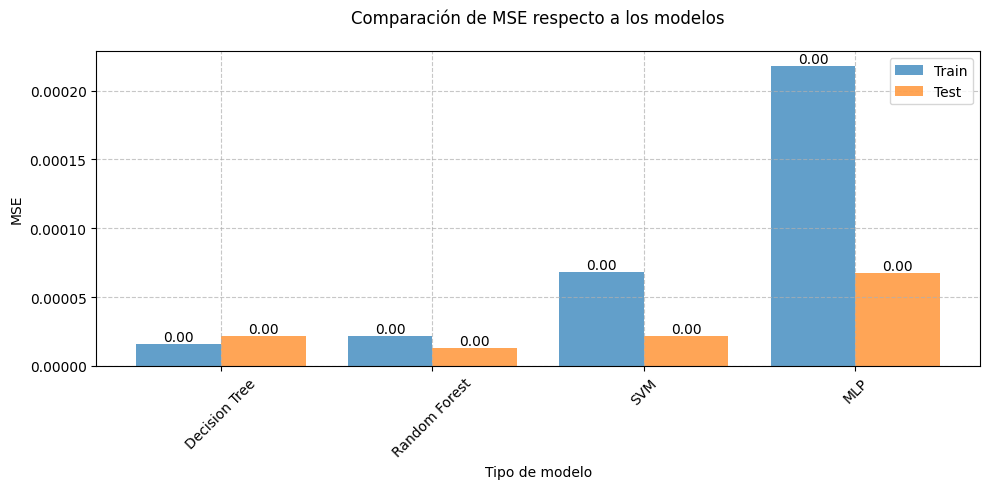

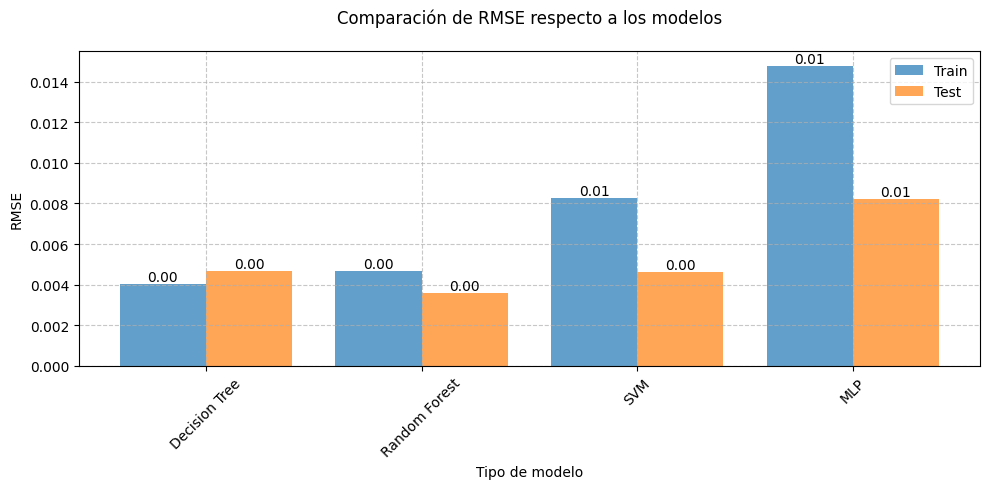

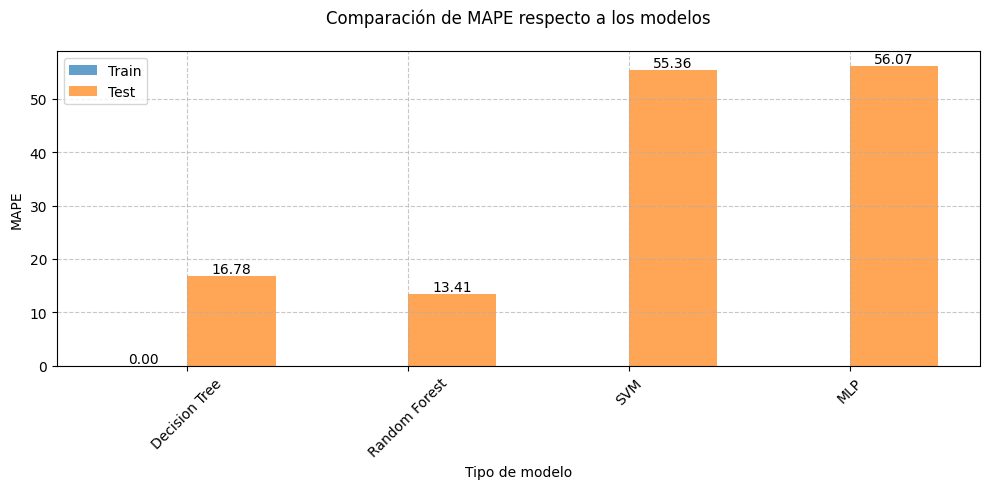

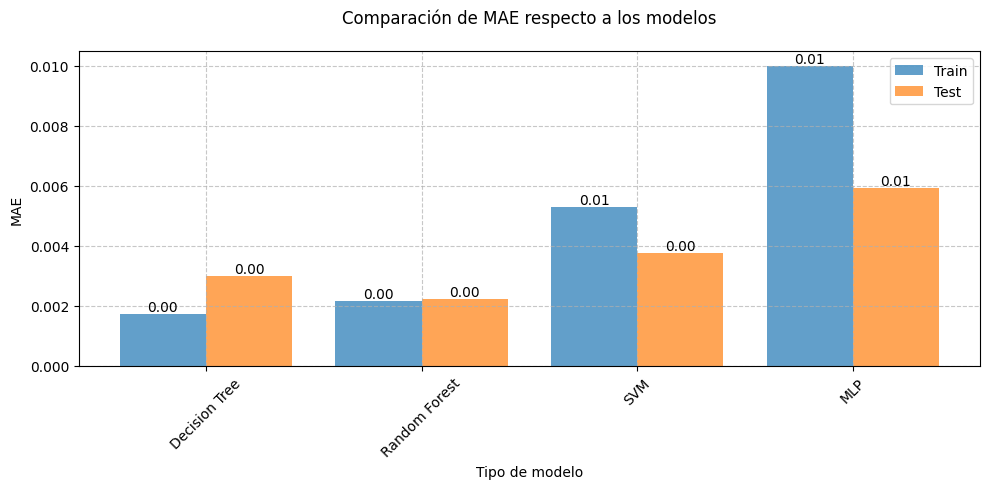

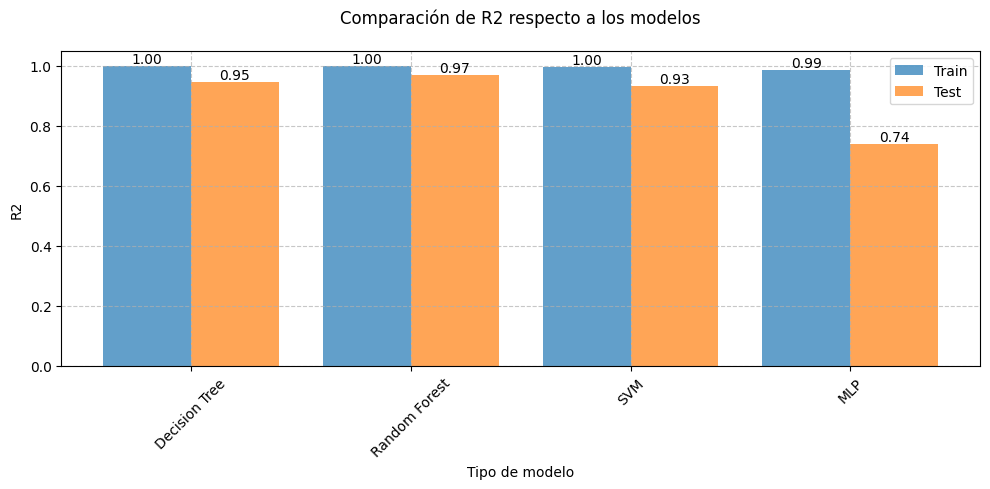

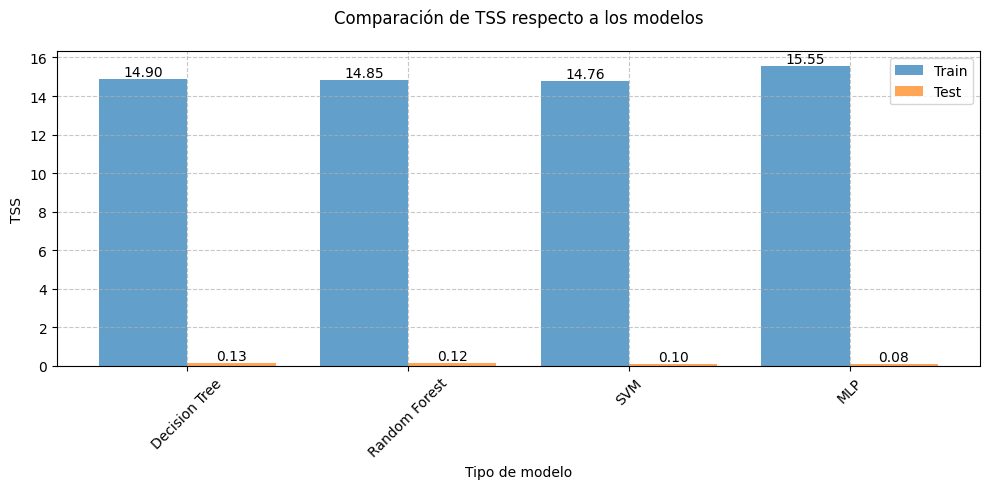

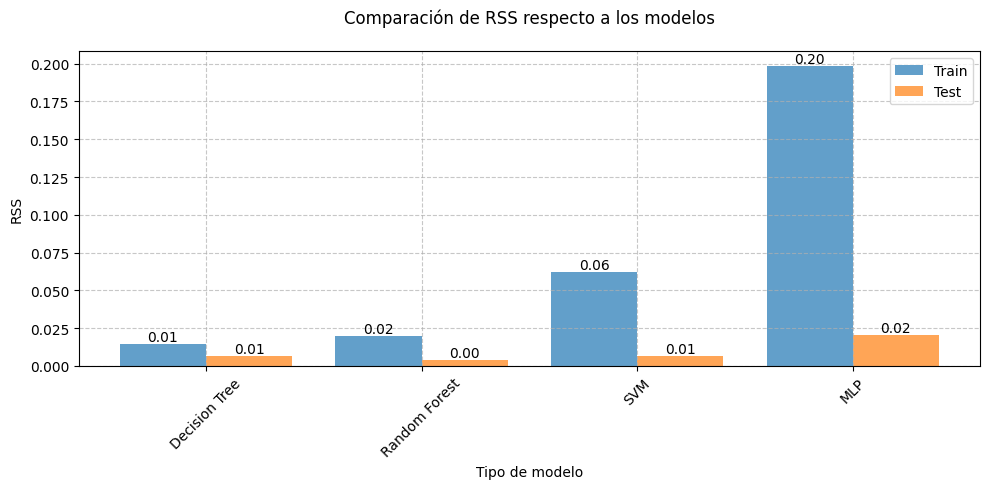

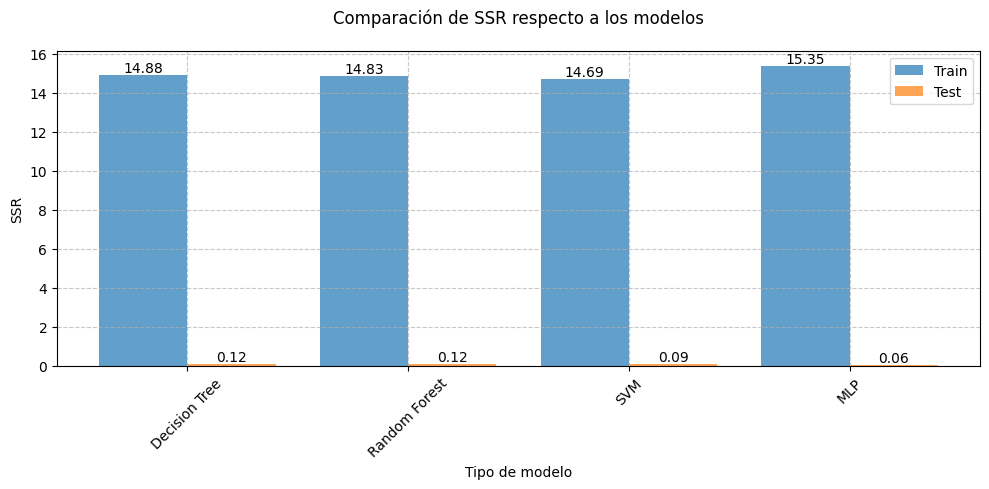

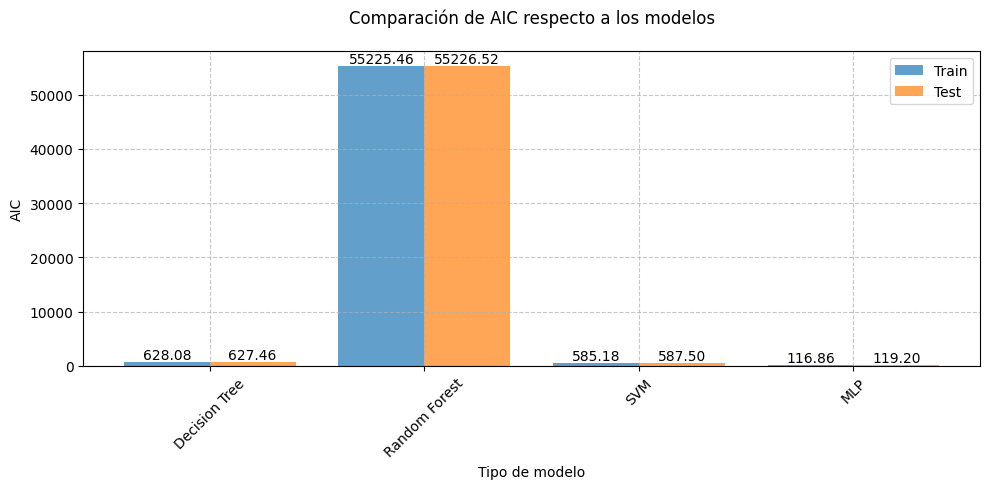

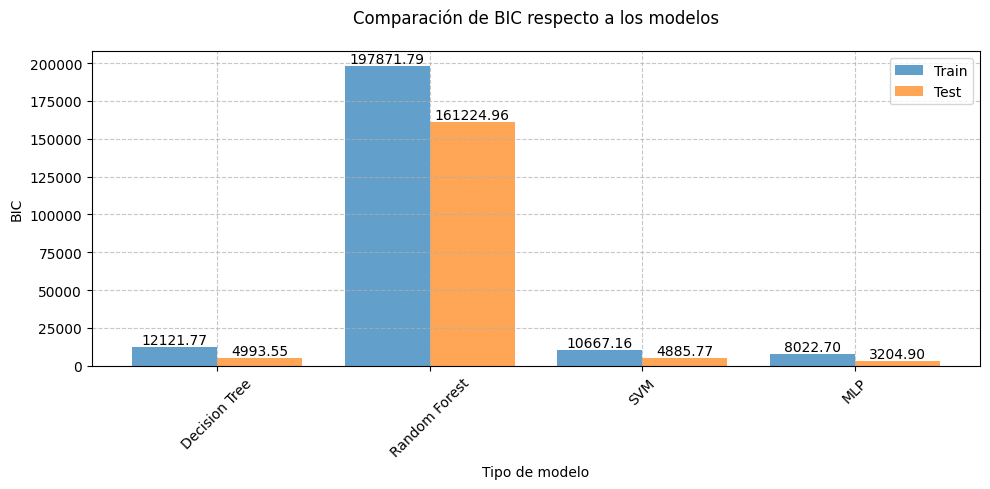

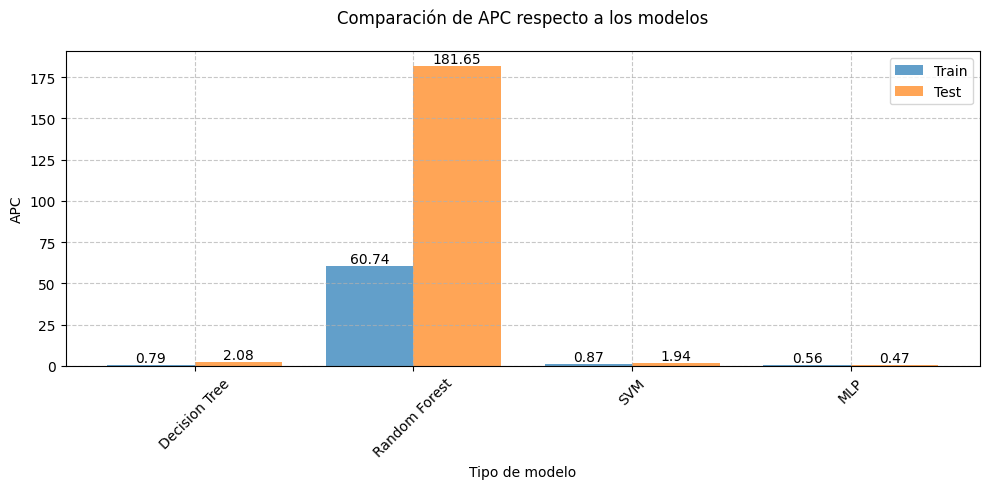

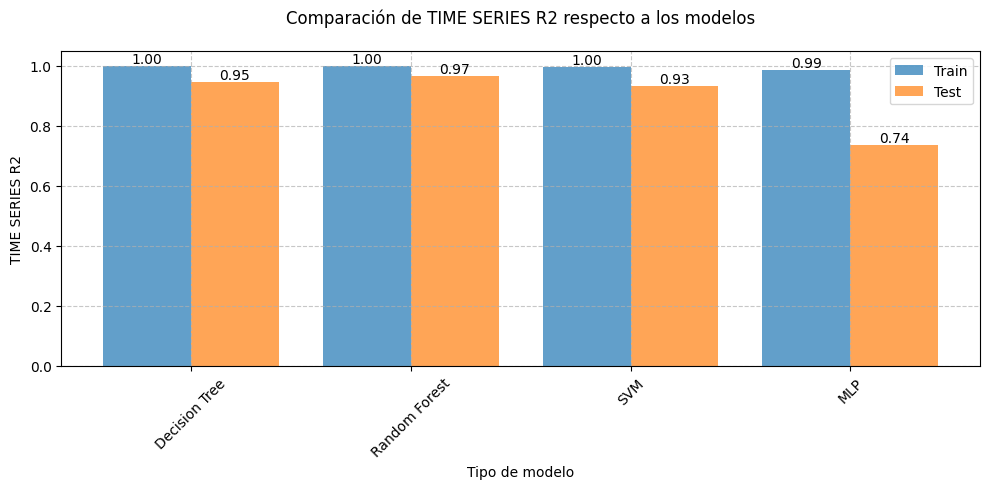

In [387]:
# Graficas de todas las métricas de train y test para cada modelo

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))  
    bars1 = plt.bar(np.arange(len(train_metrics_recuento)) - 0.2, 
                    train_metrics_recuento[metric], 0.4, 
                    label='Train', alpha=0.7)
    bars2 = plt.bar(np.arange(len(test_metrics_df)) + 0.2, 
                    test_metrics_df[metric], 0.4,
                    label='Test', alpha=0.7)
    
    plt.title(f'Comparación de {metric} respecto a los modelos', 
              fontsize=12, pad=20)
    plt.ylabel(metric, fontsize=10)
    plt.xlabel('Tipo de modelo', fontsize=10)
    plt.xticks(range(len(train_metrics_recuento)), 
               train_metrics_recuento.index.tolist(), rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(frameon=True, fancybox=True)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

### Nota Importante
Todos los resultados mostrados para las métricas de evaluación, error residual y residuales, fueron obtenidas con respecto a los datos del modelo óptimo, el modelo óptimo fue obtenido mediante la búsqueda de parámetros por Greed Search

## Significado de las Métricas de Evaluación 

###  1. RSS – Residual Sum of Squares
**¿Qué es?**  
Mide la cantidad total de error entre los valores reales y los predichos por el modelo.

**Interpretación:**  
Un RSS bajo indica que el modelo predice bien; un RSS alto sugiere que el modelo tiene errores grandes y frecuentes.

**Resultados de los modelos**
Train - El más bajo fue DT 

Test - El más bajo fue RF

---

###  2. SSR – Regression Sum of Squares
**¿Qué es?**  
Mide cuánta variabilidad de la variable dependiente ha sido explicada por el modelo.

**Interpretación:**  
Un SSR alto implica que el modelo está explicando bien la variabilidad de los datos.

**Resultados de los modelos**
Train - El más alto fue DT

Test - El más alto fue MLP

---

###  3. TSS – Total Sum of Squares
**¿Qué es?**  
Representa la variabilidad total de los datos antes de aplicar el modelo.

**Interpretación:**  
Sirve como base para comparar qué tanto mejora el modelo respecto a no usar ninguno.

**Resultados de los modelos**
Train - El más bajo fue MLP

Test - El más alto fue MLP

---

###  4. R² – Coeficiente de Determinación
**¿Qué es?**  
Indica qué proporción de la variabilidad de los datos ha sido explicada por el modelo.

**Interpretación:**  
Cuanto más cercano a 1, mejor el ajuste del modelo. Un valor cercano a 0 indica que el modelo no explica bien los datos.

**Resultados de los modelos**
Train - El más cercano a 1 fue DT, RF, SVM

Test - El más cercano a 1 fue RF

---

###  5. MSE – Mean Squared Error
**¿Qué es?**  
Promedio de los errores al cuadrado. Mide qué tan lejos están las predicciones de los valores reales.

**Interpretación:**  
Mientras menor sea el MSE, mejor es el desempeño del modelo. No es interpretable directamente porque está en unidades cuadradas.

**Resultados de los modelos**
Train - El más bajo fue DT

Test - El más bajo fue RF

---

###  6. RMSE – Root Mean Squared Error
**¿Qué es?**  
Es la raíz cuadrada del MSE. Muestra el error promedio de las predicciones en las mismas unidades que la variable objetivo.

**Interpretación:**  
Fácil de interpretar. Cuanto menor sea el RMSE, mejor es la precisión del modelo.

**Resultados de los modelos**
Train - El más bajo fue DT

Test - El más bajo fue RF

---

###  7. MAPE – Mean Absolute Percentage Error
**¿Qué es?**  
Porcentaje promedio de error entre los valores reales y los predichos.

**Interpretación:**  
Permite comparar fácilmente modelos. Un valor más bajo indica mejor precisión porcentual.

**Resultados de los modelos**
Train - El más bajo fue DT, RF, SVM, MLP

Test - El más bajo fue RF

---

###  8. R² ajustado – Adjusted R-squared
**¿Qué es?**  
R² que penaliza el uso de predictores irrelevantes. Ajusta el valor de R² según el número de variables utilizadas.

**Interpretación:**  
Mejor para comparar modelos con distinto número de variables. Aumenta solo si el nuevo predictor mejora el modelo.

**Resultados de los modelos**
Train - El más alto fue DT, RF, SVM

Test - El más alto fue RF

---

###  9. AIC – Akaike Information Criterion
**¿Qué es?**  
Métrica para comparar modelos que balancea calidad del ajuste con la complejidad del modelo.

**Interpretación:**  
Cuanto más bajo es el AIC, mejor es el modelo en términos de precisión y simplicidad.

**Resultados de los modelos**
Train - El más bajo fue MLP

Test - El más bajo fue MLP

---

###  10. BIC – Bayesian Information Criterion
**¿Qué es?**  
Similar al AIC pero penaliza más fuertemente la complejidad del modelo.

**Interpretación:**  
Se prefiere el modelo con menor BIC. Favorece modelos más simples con igual capacidad de ajuste.

**Resultados de los modelos**
Train - El más bajo fue MLP

Test - El más bajo fue MLP

---

###  11. APC – Amemiya’s Prediction Criterion
**¿Qué es?**  
Mide el rendimiento predictivo, especialmente útil en modelos de series de tiempo.

**Interpretación:**  
Valores más bajos indican mejor capacidad de predicción futura.

**Resultados de los modelos**
Train - El más bajo fue SVM

Test - El más bajo fue MLP

---

###  12. Time Series R2
**¿Qué es el R² en series de tiempo?**
Cuando se aplica en series de tiempo, el R² sigue significando lo mismo matemáticamente, pero su interpretación puede ser engañosa si no se tiene cuidado, por las dependencias temporales en los datos.

**¿Por qué es diferente en series de tiempo?**
A diferencia de datos independientes y aleatorios, en una serie temporal:

Los datos están autocorrelacionados (lo que pasa hoy depende de lo que pasó ayer).

La media ya no es un buen modelo base para comparar (como se hace en R² clásico).

Muchos modelos triviales (como un modelo que siempre predice el valor anterior) pueden tener alto R² sin realmente aprender nada.

**Interpretación**
R² cercano a 1: el modelo explica casi toda la variabilidad de la serie.

R² cercano a 0: el modelo no es mejor que predecir un valor constante (la media).

R² negativo: el modelo es peor que predecir la media. Esto es posible cuando hay muchos errores.

**Resultados de los modelos**
Train - El más alto fue DT, RF, SVM 

Test - El más alto fue RF

---


### Conclusión

En este proyecto se implementaron y evaluaron cuatro modelos de aprendizaje supervisado para predecir el comportamiento de la variable objetivo. Todos los modelos fueron ajustados mediante GridSearch, lo que permitió optimizar sus parámetros y, en consecuencia, alcanzar un buen desempeño general.

Los resultados obtenidos reflejan que, en términos de capacidad predictiva, la mayoría de los modelos lograron un alto grado de ajuste, especialmente en el conjunto de entrenamiento, donde los valores de R² se mantuvieron elevados. En el conjunto de prueba, los modelos conservaron un buen nivel de generalización, con valores típicos de R² que oscilan entre 0.90 y 0.97, lo cual indica una predicción efectiva sobre datos no vistos.

En particular, el modelo de Random Forest fue el que presentó el mejor desempeño global, seguido de cerca por el árbol de decisión (Decision Tree) y el Support Vector Machine (SVM). Por otro lado, el modelo de red neuronal Multi-Layer Perceptron (MLP) mostró un rendimiento más modesto, con un R² de aproximadamente 0.80 en entrenamiento y 0.60 en prueba, lo que indica una menor capacidad para capturar correctamente el comportamiento de la variable objetivo en comparación con los demás algoritmos.

No obstante, al considerar otras métricas relevantes como el MAPE (Mean Absolute Percentage Error) y el MSE (Mean Squared Error), se observan resultados que cambian la perspectiva. En el caso del MAPE, los resultados en el conjunto de entrenamiento fueron de 0 para todos los modelos, mientras que en el conjunto de prueba, el Random Forest obtuvo el valor más bajo, seguido de cerca por MLP. En cuanto al MSE, que penaliza fuertemente los errores grandes, Decision Tree mostró el menor error en entrenamiento, mientras que MLP obtuvo el valor más bajo en el conjunto de prueba.

Considerando que el MSE y MAPE son métricas que capturan directamente la magnitud del error de predicción, y no solo la proporción de varianza explicada, se puede justificar que el modelo MLP resulta competitivo, e incluso sobresaliente en términos de precisión numérica en algunos escenarios. Específicamente, el hecho de que MLP tenga el menor MSE en test sugiere que realiza predicciones más cercanas a los valores reales, lo cual es particularmente valioso cuando se prioriza la precisión absoluta por encima del ajuste estadístico global.

Por lo tanto, a pesar de que MLP no obtuvo el mejor R², sus valores bajos de error en MSE y MAPE en prueba sustentan una justificación válida para considerarlo como un modelo destacado, e incluso el mejor en algunos contextos del problema.

En términos generales, se concluye que los modelos desarrollados fueron adecuados para el problema planteado, logrando predecir con precisión el comportamiento de la función objetivo. Esto valida tanto la selección de modelos como el proceso de ajuste aplicado, y ofrece una base sólida para futuras mejoras o despliegues en entornos reales.

Cabe añadir que resultó un reto interesante y difícil la elaboración de este proyecto debido a que los temas abordados fueron por primera vez vistos en una materia en lo que a mi me respecta, agradezco al profesor Enrique por haberme dado las bases de conocimiento para ponerlos en práctica y lamento el desafortunio de la anulación del examen final de la materia en donde había tenido un buen desempeño (93/100), espero que este proyecto le haya sido de su agrado y le agradezco por su atención.



## Referencias

1. Sling Academy. *Understanding NumPy float64 Type: 5 Examples*. Disponible en: [https://www.slingacademy.com/article/understanding-numpy-float64-type-5-examples/](https://www.slingacademy.com/article/understanding-numpy-float64-type-5-examples/)

2. Scikit-learn. *sklearn.svm.SVR — Support Vector Regression*. Disponible en: [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

3. Scikit-learn. *sklearn.neural_network.MLPRegressor — Multi-layer Perceptron regressor*. Disponible en: [https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

4. Scikit-learn. *Support Vector Machines — SVM Regression*. Disponible en: [https://scikit-learn.org/stable/modules/svm.html#svm-regression](https://scikit-learn.org/stable/modules/svm.html#svm-regression)

5. Scikit-learn. *Decision Trees — Regression*. Disponible en: [https://scikit-learn.org/stable/modules/tree.html#regression](https://scikit-learn.org/stable/modules/tree.html#regression)

6. YouTube. *Understanding the Support Vector Machine (SVM) Algorithm*. Disponible en: [https://www.youtube.com/watch?v=kPkwf1x7zpU](https://www.youtube.com/watch?v=kPkwf1x7zpU)

7. YouTube. *Multi-Layer Perceptron (MLP) explained*. Disponible en: [https://www.youtube.com/watch?v=019ZGqEvpyA](https://www.youtube.com/watch?v=019ZGqEvpyA)

8. Codefinity. *MLP Regressor tutorial - Hands-on practice*. Disponible en: [https://codefinity.com/courses/...](https://codefinity.com/courses/v2/a65bbc96-309e-4df9-a790-a1eb8c815a1c/1fce4aa9-710f-4bc9-ad66-16b4b2d30929/242ac1b2-f70c-4458-adff-22af201064dc)
